In [1]:
!jupyter nbconvert --to markdown CUSTOMER-CHURN.ipynb

[NbConvertApp] Converting notebook CUSTOMER-CHURN.ipynb to markdown
[NbConvertApp] Support files will be in CUSTOMER-CHURN_files\
[NbConvertApp] Making directory CUSTOMER-CHURN_files
[NbConvertApp] Making directory CUSTOMER-CHURN_files
[NbConvertApp] Making directory CUSTOMER-CHURN_files
[NbConvertApp] Making directory CUSTOMER-CHURN_files
[NbConvertApp] Making directory CUSTOMER-CHURN_files
[NbConvertApp] Making directory CUSTOMER-CHURN_files
[NbConvertApp] Making directory CUSTOMER-CHURN_files
[NbConvertApp] Making directory CUSTOMER-CHURN_files
[NbConvertApp] Making directory CUSTOMER-CHURN_files
[NbConvertApp] Making directory CUSTOMER-CHURN_files
[NbConvertApp] Making directory CUSTOMER-CHURN_files
[NbConvertApp] Making directory CUSTOMER-CHURN_files
[NbConvertApp] Making directory CUSTOMER-CHURN_files
[NbConvertApp] Making directory CUSTOMER-CHURN_files
[NbConvertApp] Making directory CUSTOMER-CHURN_files
[NbConvertApp] Making directory CUSTOMER-CHURN_files
[NbConvertApp] Making 

#### READ-ME

In [169]:
# This GitHub repository contains a detailed analysis of customer churn in ConnectTel, emphasizing Exploratory Data Analysis (EDA) and Feature Engineering. By gaining insights into customer churn, with aim to inform decision-making for customer retention strategies and business growth. In this project, I performed a comprehensive EDA to understand the dataset and its features. Some of the EDA done involves;
# a.  Visualized the relationships between key features and the target variable (customer churn).
# b.  Explored correlations among features to identify significant patterns.
# c.  Conducted univariate and bivariate analyses to gain a deeper understanding of the data.

# Feature engineering is essential for preparing data for machine learning models. In this project, I Encoded categorical variables to prepare them for modeling, Introduced new features where necessary to enhance model performance.

# I welcome contributions and feedback to enhance the analysis and extend the project's capabilities.

# Note: This is an open-source project with the goal of improving customer retention strategies for ConnectTel.


In [165]:
# pip install xgboost

In [6]:
# Read in the data set
data = pd.read_csv("CUSTOMER CHURN.csv")

In [7]:
data.shape

(7043, 21)

In [143]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression,LinearRegression, SGDClassifier
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, classification_report, precision_score,recall_score, f1_score, roc_auc_score, confusion_matrix 
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans,AgglomerativeClustering,DBSCAN,SpectralClustering
from yellowbrick.cluster import KElbowVisualizer
from sklearn.ensemble import GradientBoostingClassifier,RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.impute import SimpleImputer

from xgboost import XGBClassifier
from sklearn.svm import SVC


import warnings
warnings.filterwarnings("ignore")
                                        

In [9]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [10]:
data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

### Data cleaning

In [11]:
# Drop the CustomerID column since the index column means the same
data.drop('customerID', axis =1, inplace = True)

In [12]:
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [13]:
data.isnull()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
7039,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
7040,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
7041,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [15]:
# Check for missing values
data.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [16]:
data.duplicated().sum()

22

In [17]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [19]:
data['TotalCharges'].head()

0      29.85
1     1889.5
2     108.15
3    1840.75
4     151.65
Name: TotalCharges, dtype: object

In [20]:
data['TotalCharges'].unique()

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [21]:
# Convert 'TotalCharges' column to float, handling invalid values as 'coerce'
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')

## Exploratory Data Analysis

### Univariate Analysis

<Axes: ylabel='Churn'>

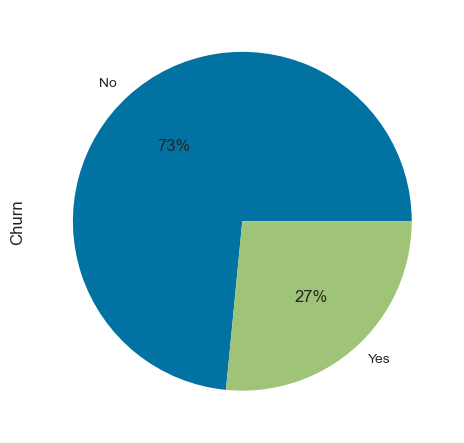

In [22]:
# Visualizing churn distribution using a countplot
data['Churn'].value_counts().plot(kind='pie', autopct='%1.0f%%')

In [23]:
data['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

Male      3555
Female    3488
Name: gender, dtype: int64

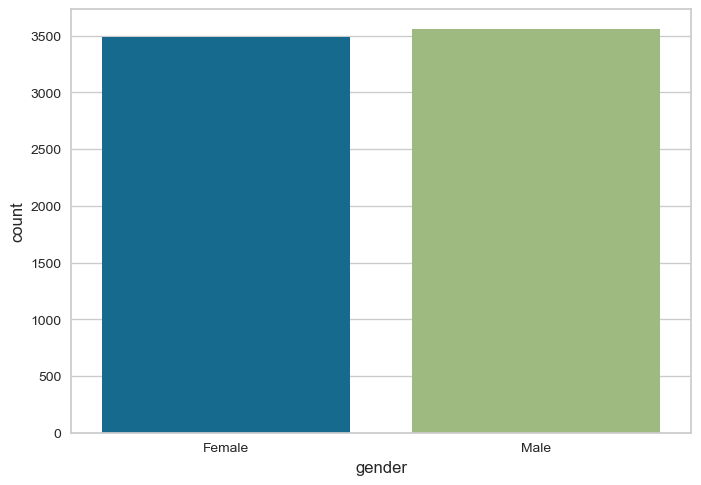

In [24]:
sns.countplot(data, x="gender")
data['gender'].value_counts()

0    5901
1    1142
Name: SeniorCitizen, dtype: int64

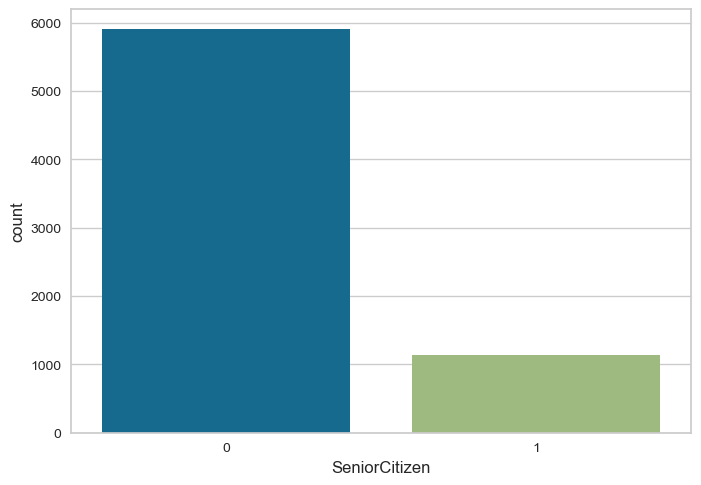

In [26]:
sns.countplot(data, x="SeniorCitizen")

data['SeniorCitizen'].value_counts()

<Axes: ylabel='SeniorCitizen'>

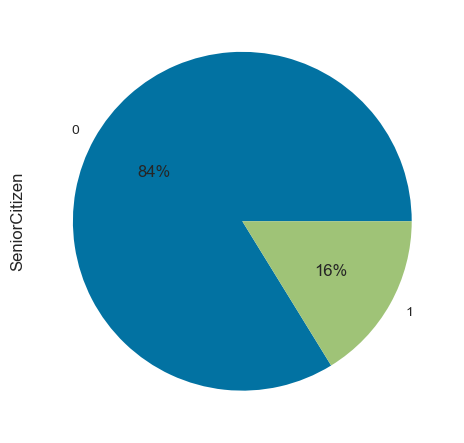

In [27]:
data['SeniorCitizen'].value_counts().plot(kind='pie', autopct='%1.0f%%')

No     3641
Yes    3402
Name: Partner, dtype: int64

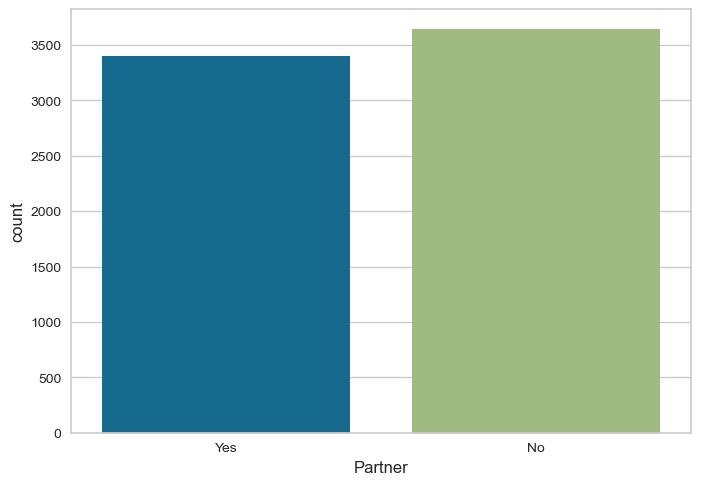

In [28]:
sns.countplot(data, x="Partner")
data['Partner'].value_counts()

<Axes: ylabel='Partner'>

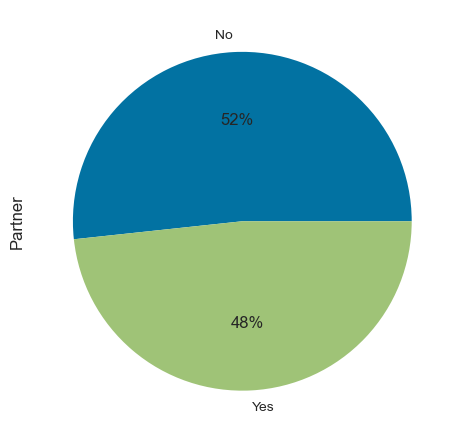

In [29]:
# Visualizing churn distribution using a countplot
data['Partner'].value_counts().plot(kind='pie', autopct='%1.0f%%')

<Axes: ylabel='Dependents'>

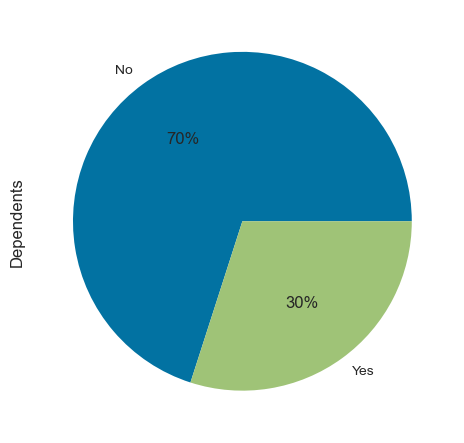

In [30]:
# Visualizing churn distribution using a countplot
data['Dependents'].value_counts().plot(kind='pie', autopct='%1.0f%%')

<Axes: xlabel='Dependents', ylabel='count'>

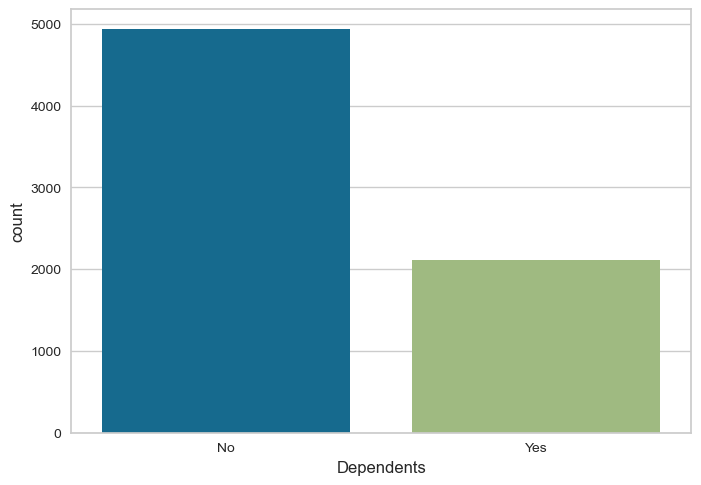

In [32]:
sns.countplot(data, x="Dependents")

In [31]:
data['Dependents'].value_counts()

No     4933
Yes    2110
Name: Dependents, dtype: int64

<Axes: xlabel='Churn', ylabel='tenure'>

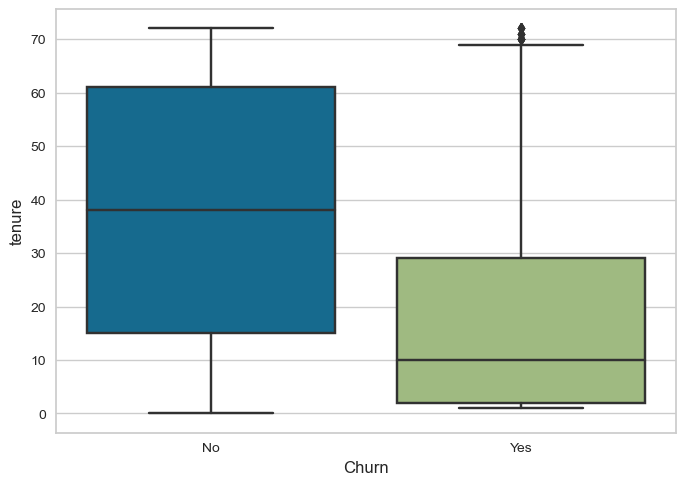

In [33]:
sns.boxplot(data, x='Churn', y='tenure')

<Axes: xlabel='PhoneService', ylabel='count'>

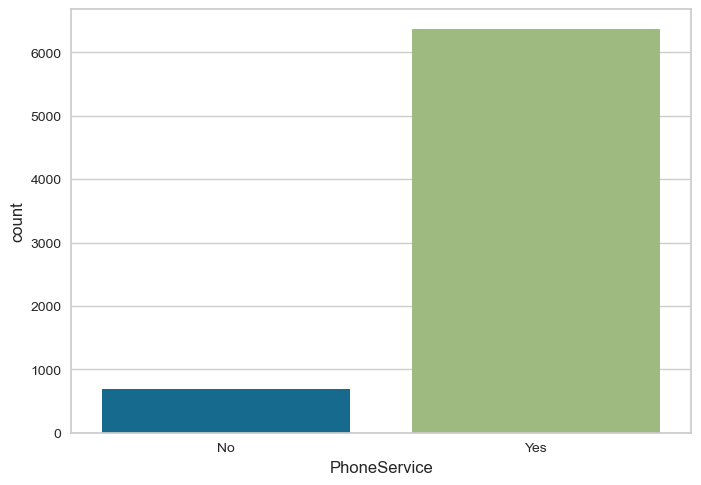

In [34]:
sns.countplot(data, x="PhoneService")

<Axes: ylabel='PhoneService'>

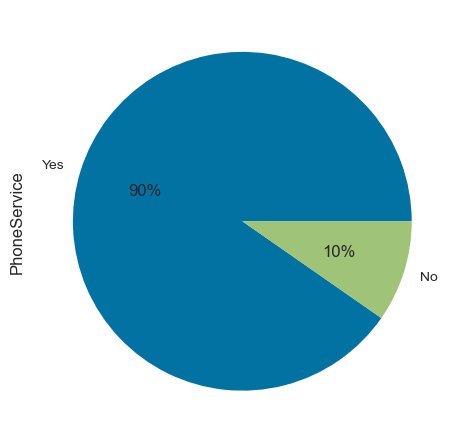

In [35]:
# Visualizing churn distribution using a countplot
data['PhoneService'].value_counts().plot(kind='pie', autopct='%1.0f%%')

In [36]:
data['PhoneService'].value_counts()

Yes    6361
No      682
Name: PhoneService, dtype: int64

No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64

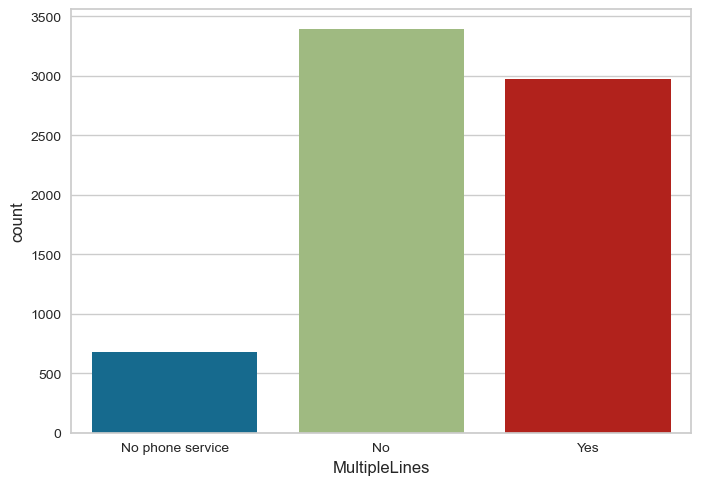

In [43]:
sns.countplot(data, x="MultipleLines")
data['MultipleLines'].value_counts()

<Axes: ylabel='MultipleLines'>

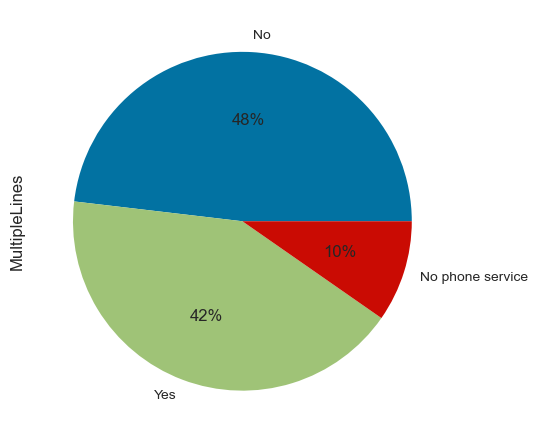

In [44]:
# Visualizing churn distribution using a countplot
data['MultipleLines'].value_counts().plot(kind='pie', autopct='%1.0f%%')

Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64

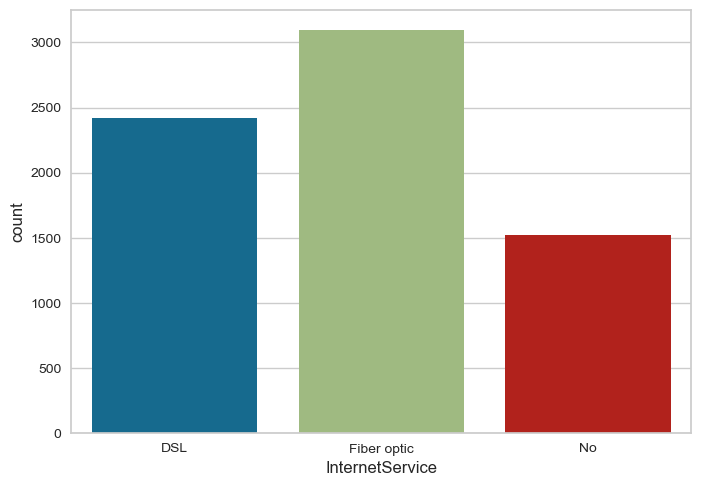

In [45]:
sns.countplot(data, x="InternetService")
data['InternetService'].value_counts()

<Axes: ylabel='InternetService'>

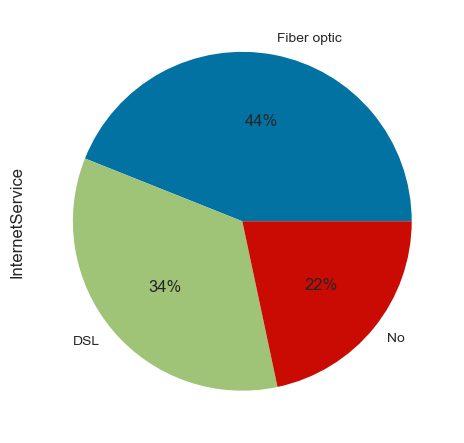

In [41]:
# Visualizing churn distribution using a countplot
data['InternetService'].value_counts().plot(kind='pie', autopct='%1.0f%%')

No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64

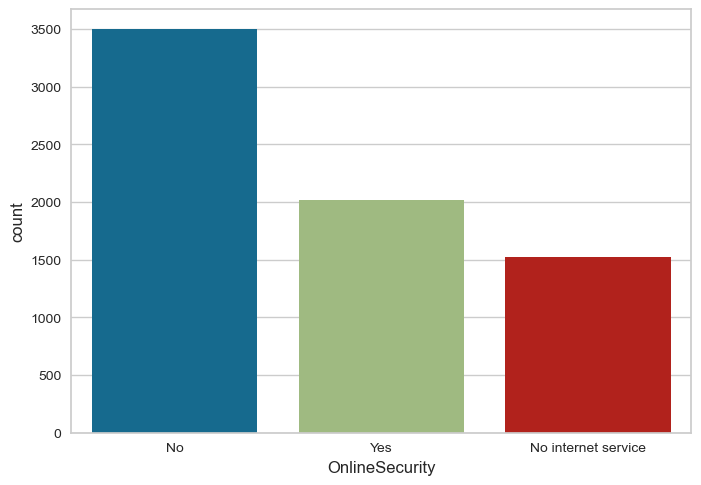

In [48]:
sns.countplot(data, x="OnlineSecurity")
# Visualizing churn distribution using a countplot
data['OnlineSecurity'].value_counts()

<Axes: ylabel='OnlineSecurity'>

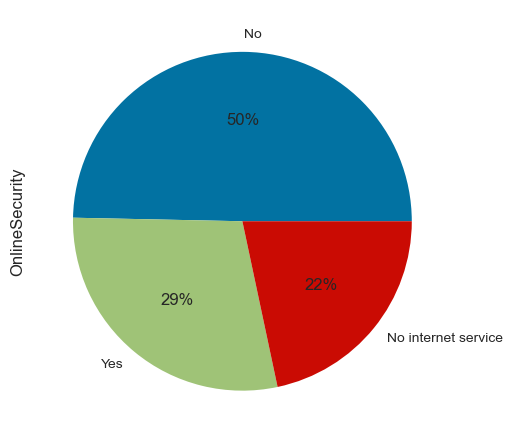

In [47]:
# Visualizing churn distribution using a countplot
data['OnlineSecurity'].value_counts().plot(kind='pie', autopct='%1.0f%%')

No                     3088
Yes                    2429
No internet service    1526
Name: OnlineBackup, dtype: int64

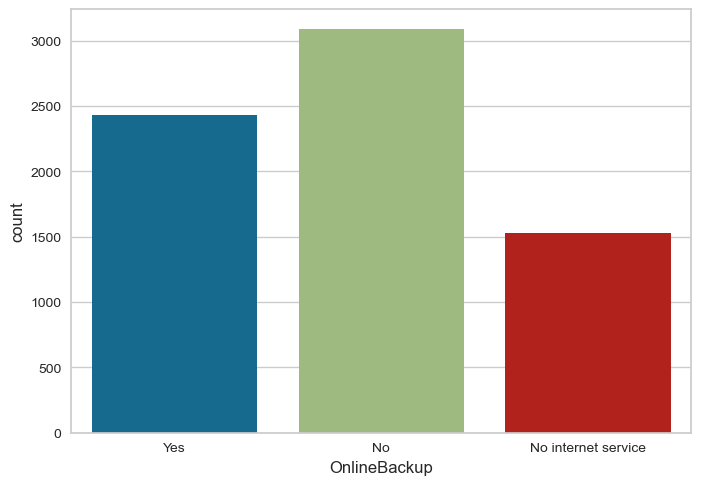

In [49]:
sns.countplot(data, x="OnlineBackup")
data['OnlineBackup'].value_counts()

<Axes: ylabel='OnlineBackup'>

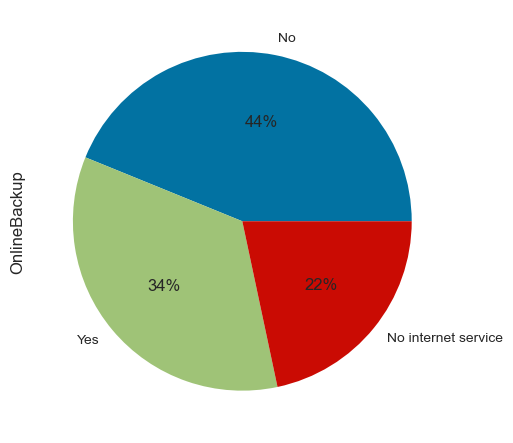

In [50]:
# Visualizing churn distribution using a countplot
data['OnlineBackup'].value_counts().plot(kind='pie', autopct='%1.0f%%')

No                     3095
Yes                    2422
No internet service    1526
Name: DeviceProtection, dtype: int64

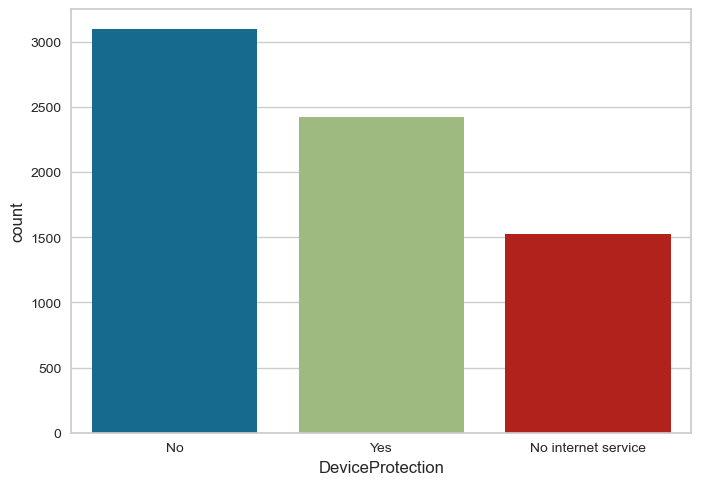

In [51]:
sns.countplot(data, x="DeviceProtection")
data['DeviceProtection'].value_counts()

<Axes: ylabel='DeviceProtection'>

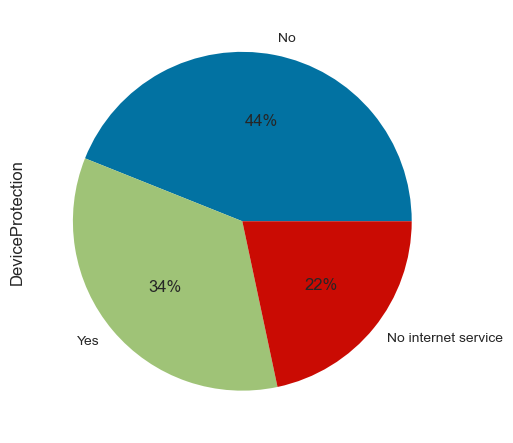

In [52]:
# Visualizing churn distribution using a countplot
data['DeviceProtection'].value_counts().plot(kind='pie', autopct='%1.0f%%')

No                     3473
Yes                    2044
No internet service    1526
Name: TechSupport, dtype: int64

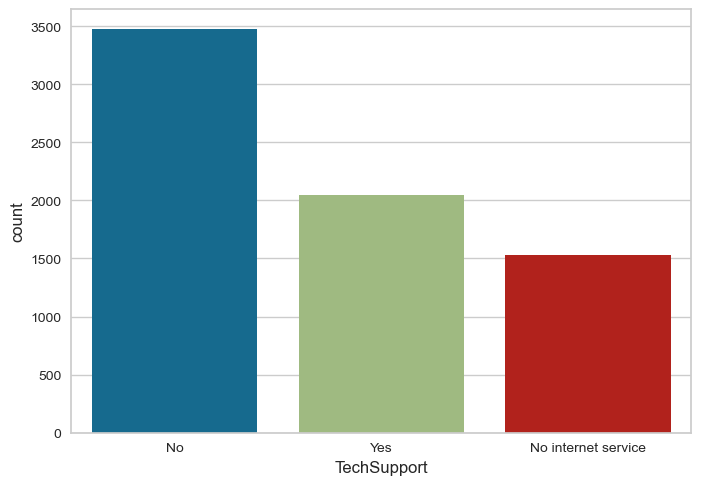

In [53]:
sns.countplot(data, x="TechSupport")
data['TechSupport'].value_counts()

<Axes: ylabel='TechSupport'>

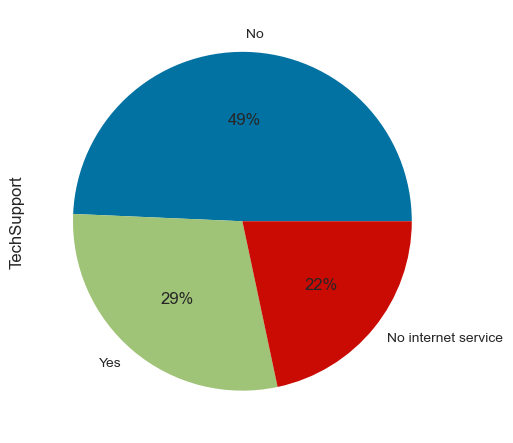

In [54]:
# Visualizing churn distribution using a countplot
data['TechSupport'].value_counts().plot(kind='pie', autopct='%1.0f%%')

No                     2810
Yes                    2707
No internet service    1526
Name: StreamingTV, dtype: int64

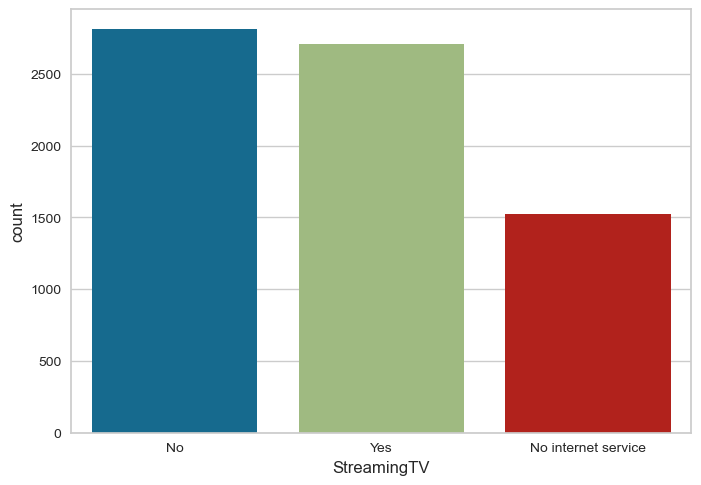

In [55]:
sns.countplot(data, x="StreamingTV")
data['StreamingTV'].value_counts()

<Axes: ylabel='StreamingTV'>

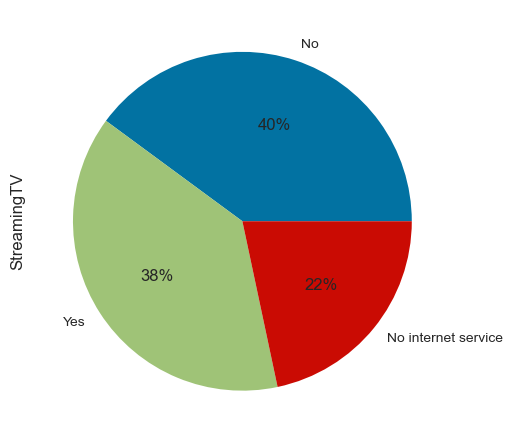

In [56]:
# Visualizing churn distribution using a countplot
data['StreamingTV'].value_counts().plot(kind='pie', autopct='%1.0f%%')

No                     2785
Yes                    2732
No internet service    1526
Name: StreamingMovies, dtype: int64

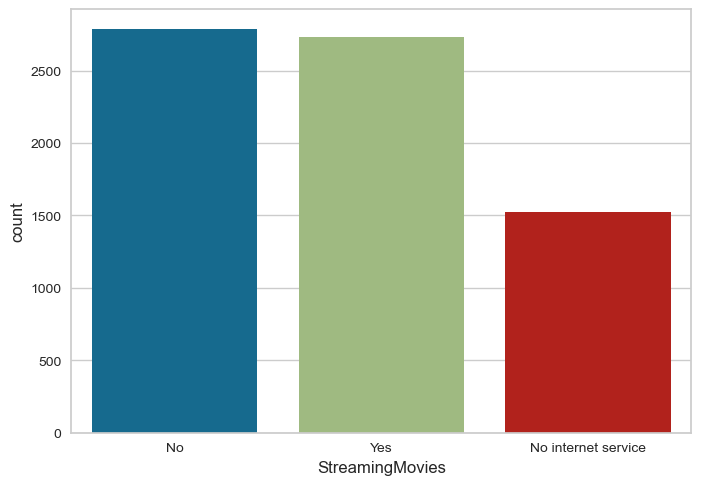

In [57]:
sns.countplot(data, x="StreamingMovies")
data['StreamingMovies'].value_counts()

<Axes: ylabel='StreamingMovies'>

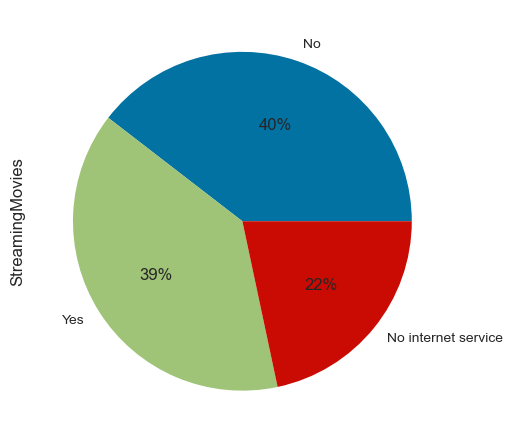

In [58]:
data['StreamingMovies'].value_counts().plot(kind='pie', autopct='%1.0f%%')

Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64

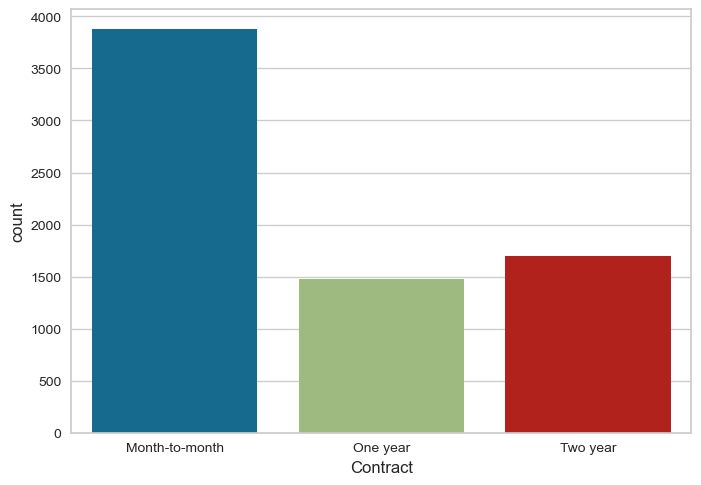

In [59]:
sns.countplot(data, x="Contract")
data['Contract'].value_counts()

<Axes: ylabel='Contract'>

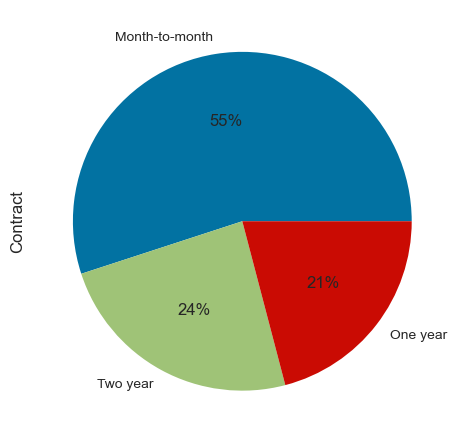

In [60]:
# Visualizing churn distribution using a countplot
data['Contract'].value_counts().plot(kind='pie', autopct='%1.0f%%')

Yes    4171
No     2872
Name: PaperlessBilling, dtype: int64

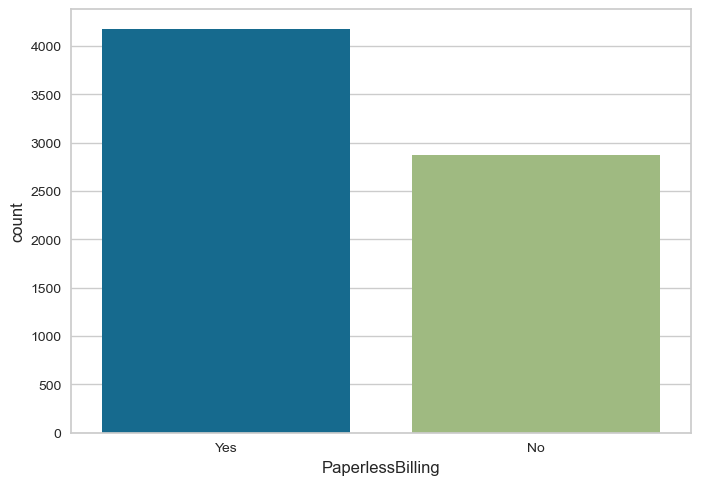

In [62]:
sns.countplot(data, x="PaperlessBilling")
data['PaperlessBilling'].value_counts()

<Axes: ylabel='PaperlessBilling'>

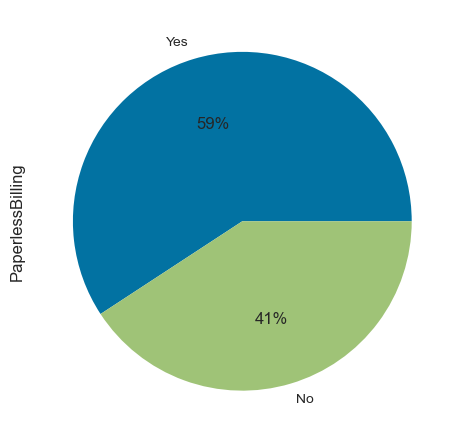

In [61]:
# Visualizing churn distribution using a countplot
data['PaperlessBilling'].value_counts().plot(kind='pie', autopct='%1.0f%%')

<Axes: ylabel='PaymentMethod'>

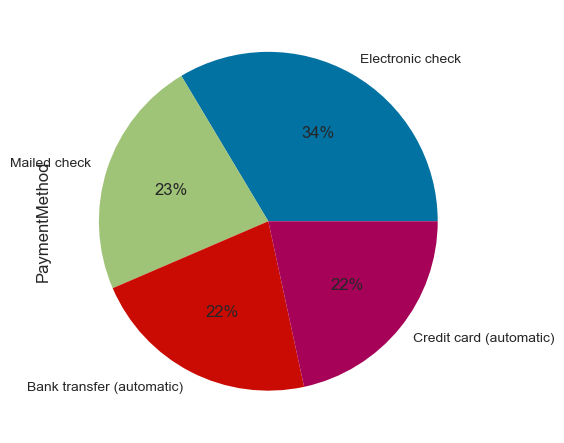

In [63]:
data['PaymentMethod'].value_counts().plot(kind='pie', autopct='%1.0f%%')

<Axes: xlabel='PaymentMethod', ylabel='count'>

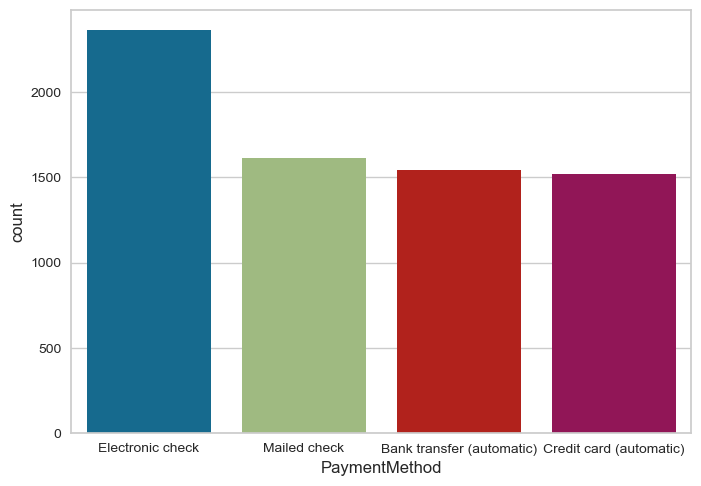

In [64]:
data['PaymentMethod'].value_counts()
sns.countplot(data, x="PaymentMethod")

<Axes: >

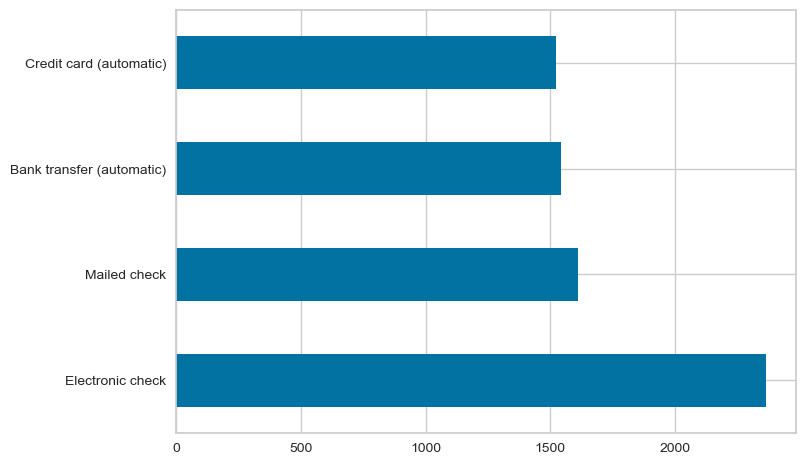

In [65]:
data['PaymentMethod'].value_counts().plot(kind='barh')

<Axes: xlabel='Churn', ylabel='MonthlyCharges'>

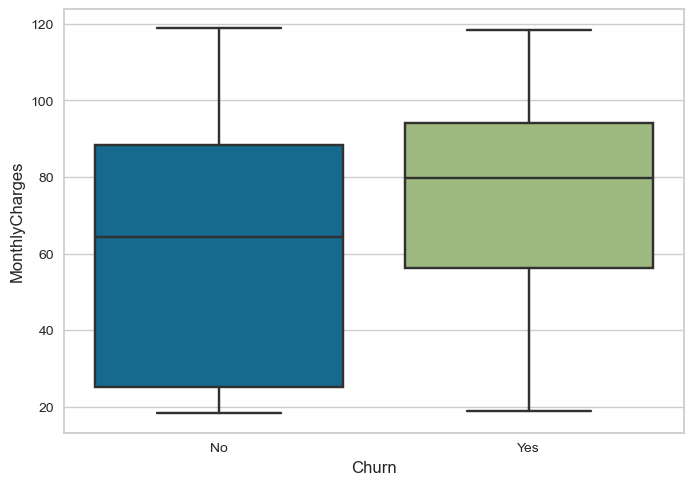

In [66]:
sns.boxplot(data, x='Churn', y='MonthlyCharges')

<Axes: xlabel='Churn', ylabel='tenure'>

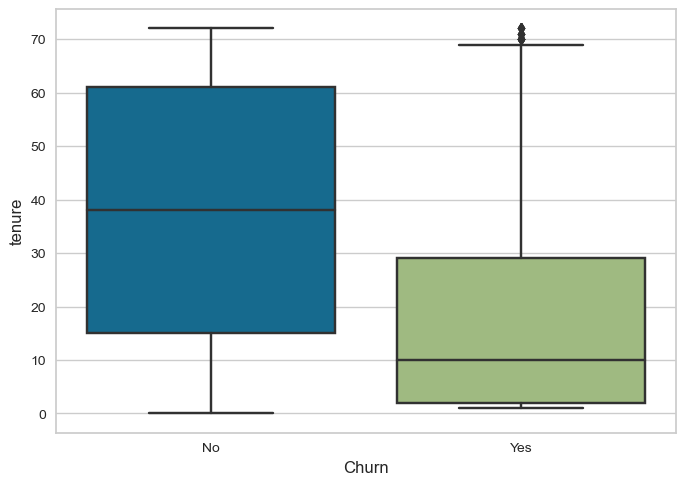

In [67]:
sns.boxplot(data, x='Churn', y='tenure')

<Axes: xlabel='Churn', ylabel='TotalCharges'>

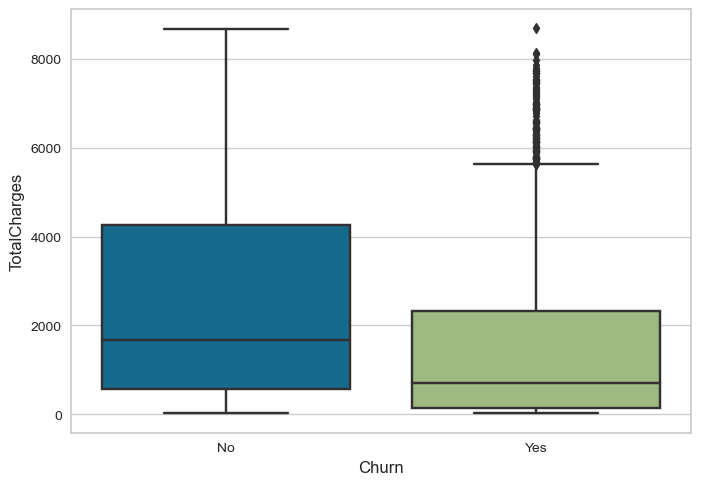

In [68]:
sns.boxplot(data, x='Churn', y='TotalCharges')

<Axes: xlabel='Churn', ylabel='MonthlyCharges'>

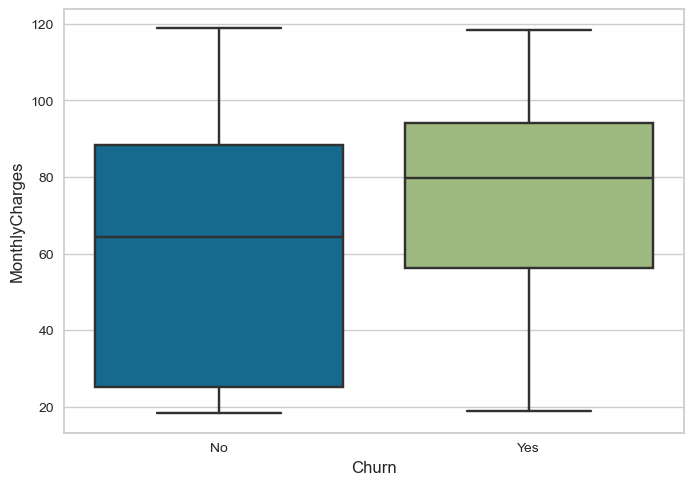

In [69]:
sns.boxplot(data, x='Churn', y='MonthlyCharges')

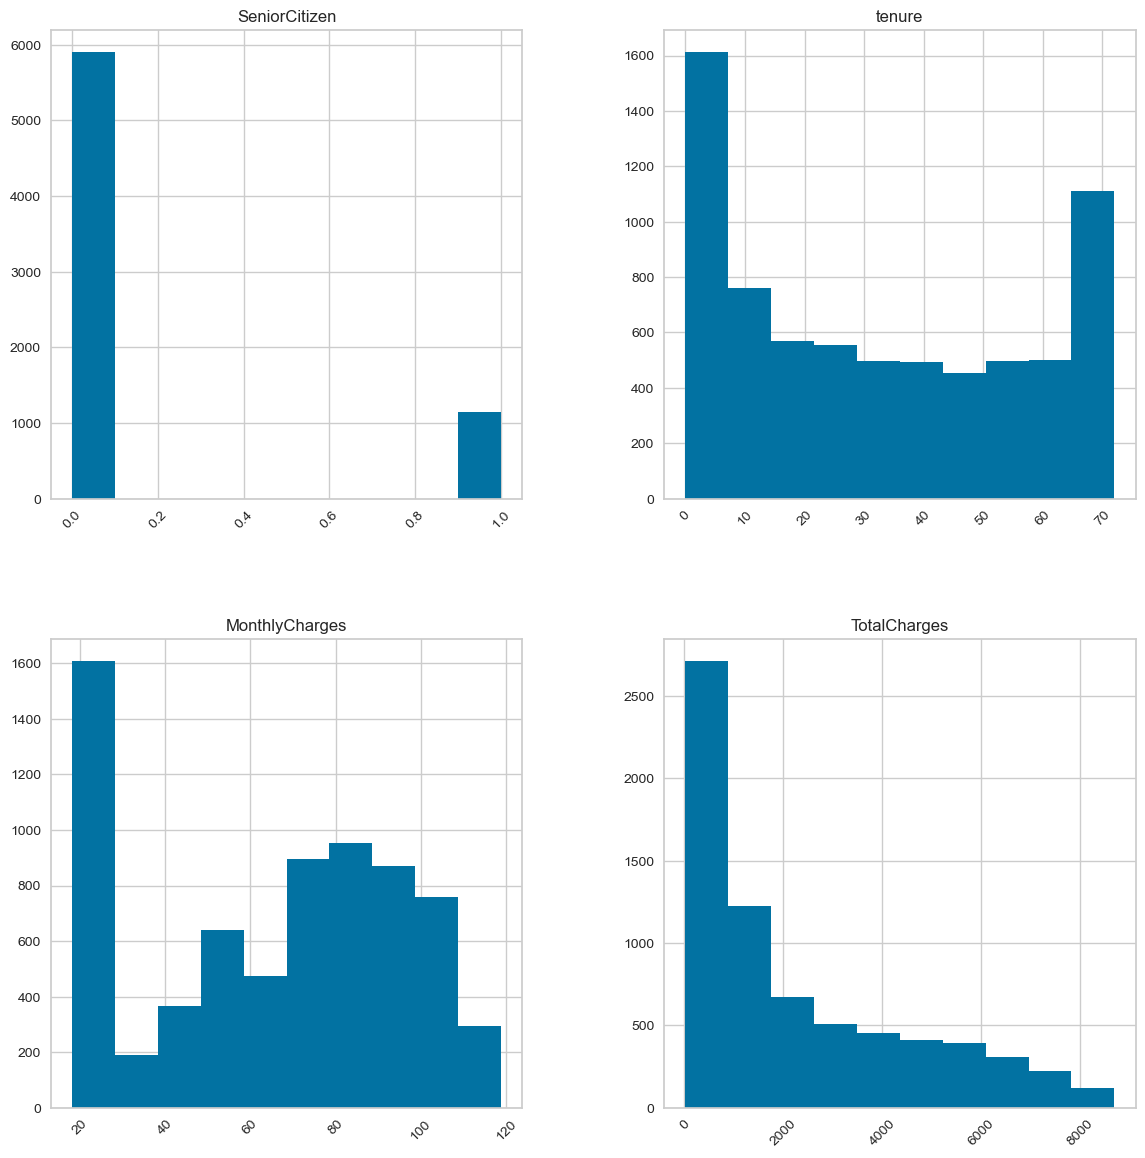

In [70]:
data.hist(figsize=(14,14), xrot=45)
plt.show()

In [71]:
data.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

### Bivariate Analysis

In [72]:
data.corr()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
SeniorCitizen,1.000000,0.016567,0.220173,0.102411
tenure,0.016567,1.000000,0.247900,0.825880
MonthlyCharges,0.220173,0.247900,1.000000,0.651065
TotalCharges,0.102411,0.825880,0.651065,1.000000


In [73]:
# Convert categorical data 'Churn' to numerical data using replace
data['Churn'] = data['Churn'].replace({'Yes': 0, 'No': 1})

In [74]:
data.corr()[['Churn']].sort_values(by='Churn')

,Churn
MonthlyCharges,-0.193356
SeniorCitizen,-0.150889
TotalCharges,0.199484
tenure,0.352229
Churn,1.000000


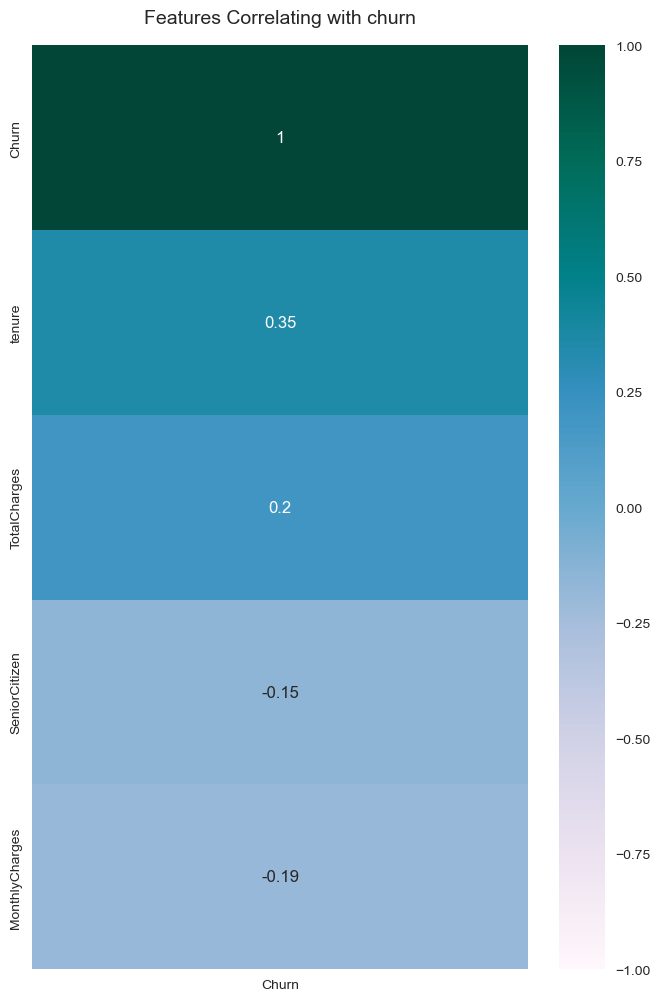

In [75]:
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(data.corr()[['Churn']].sort_values(by='Churn', ascending=False), vmin=-1, vmax=1, annot=True, cmap ='PuBuGn')
heatmap.set_title('Features Correlating with churn',fontdict={'fontsize':14}, pad=16);

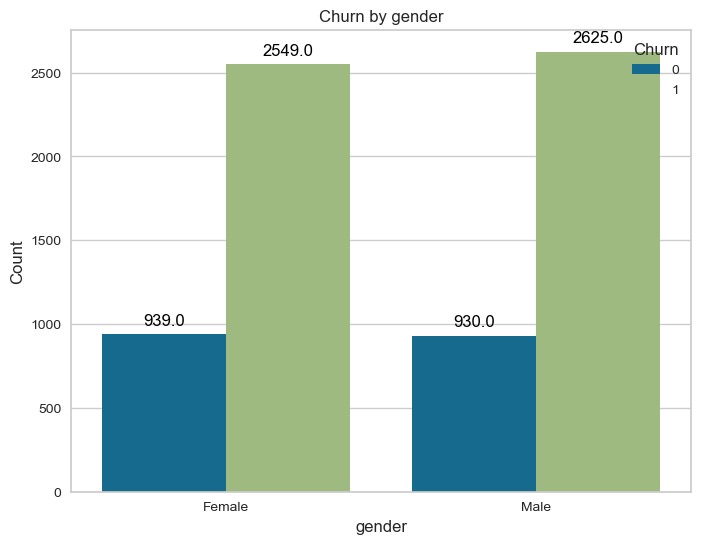

In [76]:
# Visualizing churn by gender
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='gender', hue='Churn', data=data)
plt.title('Churn by gender')
plt.xlabel('gender')
plt.ylabel('Count')
plt.legend(title='Churn', loc='upper right')

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=12, color='black', xytext=(0, 10),
                textcoords='offset points')

plt.xticks([0, 1], ['Female', 'Male'])
plt.show()

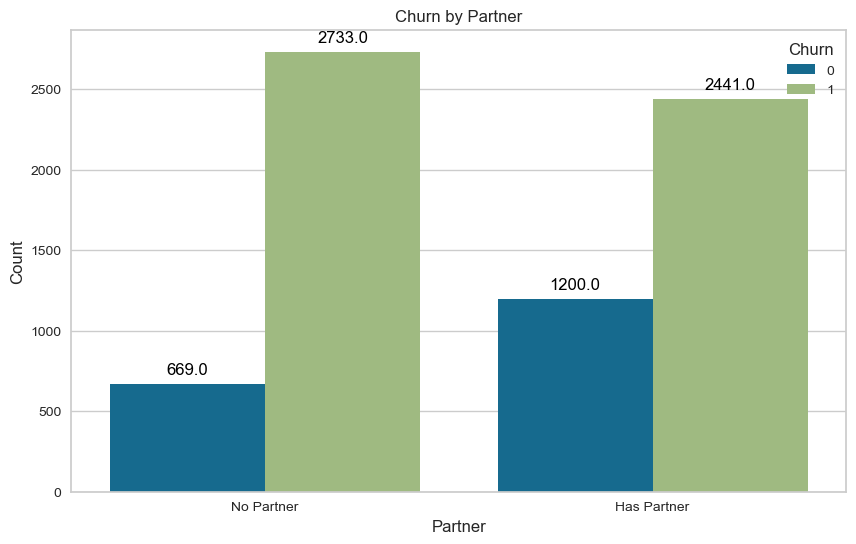

In [77]:
# Visualizing churn by Senior Partner
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='Partner', hue='Churn', data=data)
plt.title('Churn by Partner')
plt.xlabel('Partner')
plt.ylabel('Count')
plt.legend(title='Churn', loc='upper right')

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=12, color='black', xytext=(0, 10),
                textcoords='offset points')

plt.xticks([0, 1], ['No Partner', 'Has Partner'])
plt.show()

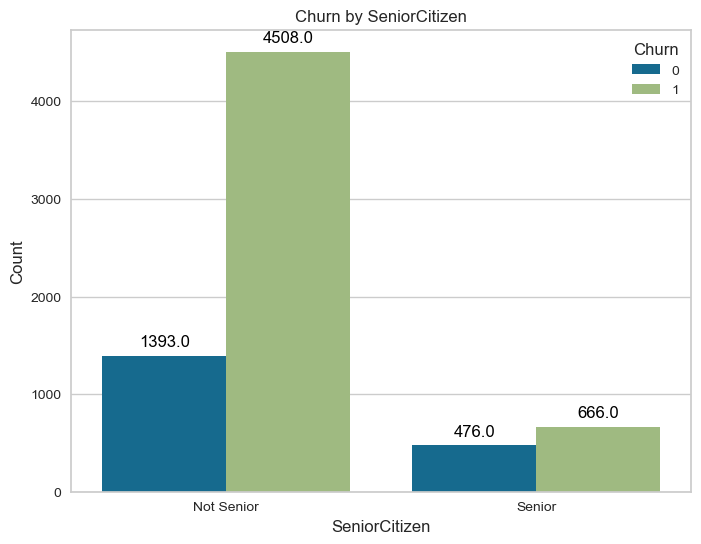

In [78]:
# Visualizing churn by Senior Citizen
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='SeniorCitizen', hue='Churn', data=data)
plt.title('Churn by SeniorCitizen')
plt.xlabel('SeniorCitizen')
plt.ylabel('Count')
plt.legend(title='Churn', loc='upper right')

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=12, color='black', xytext=(0, 10),
                textcoords='offset points')

plt.xticks([0, 1], ['Not Senior', 'Senior'])
plt.show()

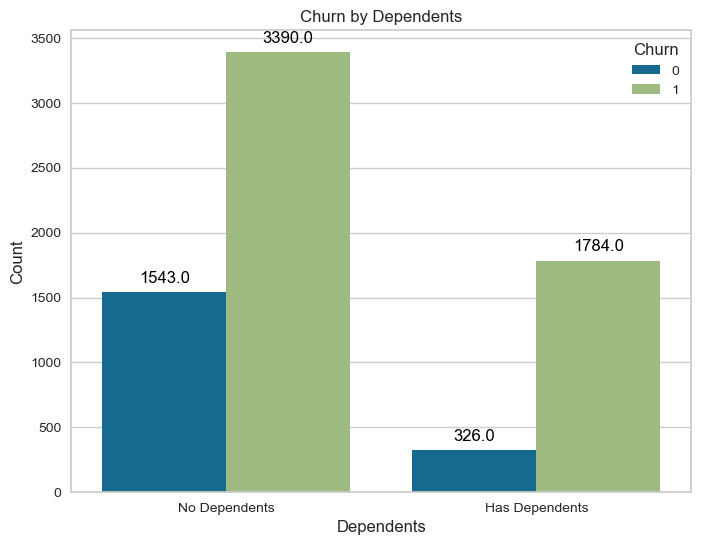

In [79]:
# Visualizing churn by Dependents

plt.figure(figsize=(8, 6))
ax = sns.countplot(x='Dependents', hue='Churn', data=data)
plt.title('Churn by Dependents')
plt.xlabel('Dependents')
plt.ylabel('Count')
plt.legend(title='Churn', loc='upper right')

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=12, color='black', xytext=(0, 10),
                textcoords='offset points')

plt.xticks([0, 1], ['No Dependents', 'Has Dependents'])
plt.show()

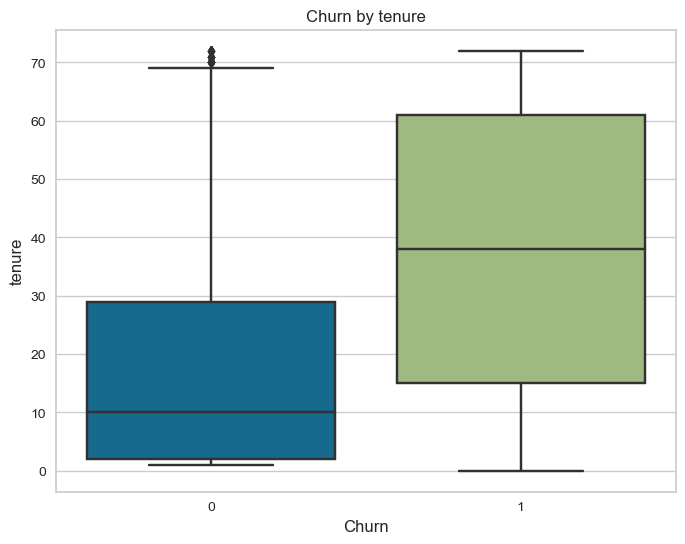

In [80]:
# Visualize tenure by Churn using box plot
plt.figure(figsize=(8, 6))
sns.boxplot(x='Churn', y='tenure', data=data)
plt.title('Churn by tenure')
plt.xlabel('Churn')
plt.ylabel('tenure')
plt.show()

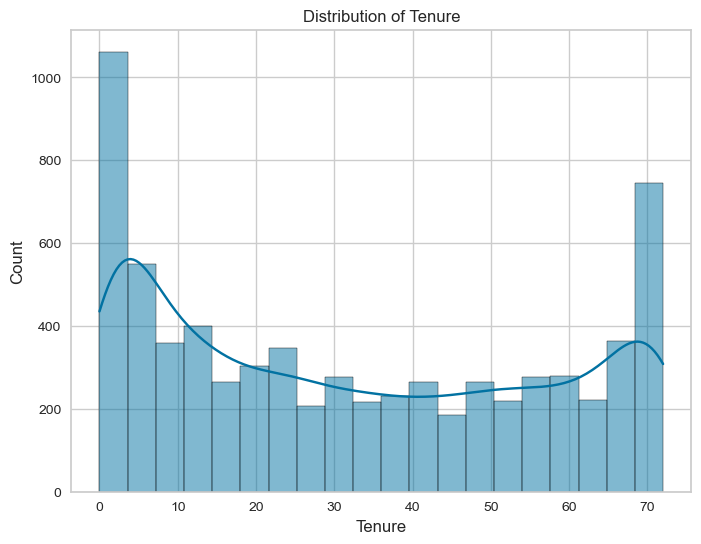

In [81]:
# Visualizing churn by tenure
plt.figure(figsize=(8, 6))
sns.histplot(data=data, x='tenure', bins=20, kde=True)
plt.title('Distribution of Tenure')
plt.xlabel('Tenure')
plt.ylabel('Count')
plt.show()

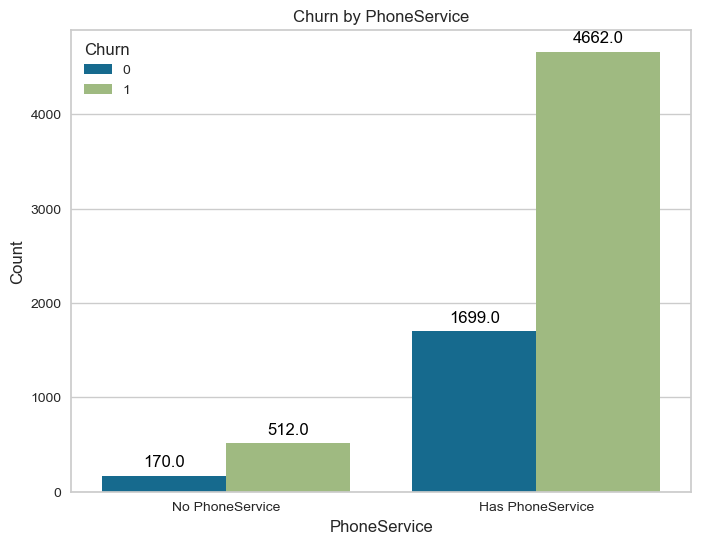

In [82]:
# Visualizing churn by PhoneService
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='PhoneService', hue='Churn', data=data)
plt.title('Churn by PhoneService')
plt.xlabel('PhoneService')
plt.ylabel('Count')
plt.legend(title='Churn', loc='upper left')

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=12, color='black', xytext=(0, 10),
                textcoords='offset points')

plt.xticks([0, 1], ['No PhoneService', 'Has PhoneService'])

plt.show()

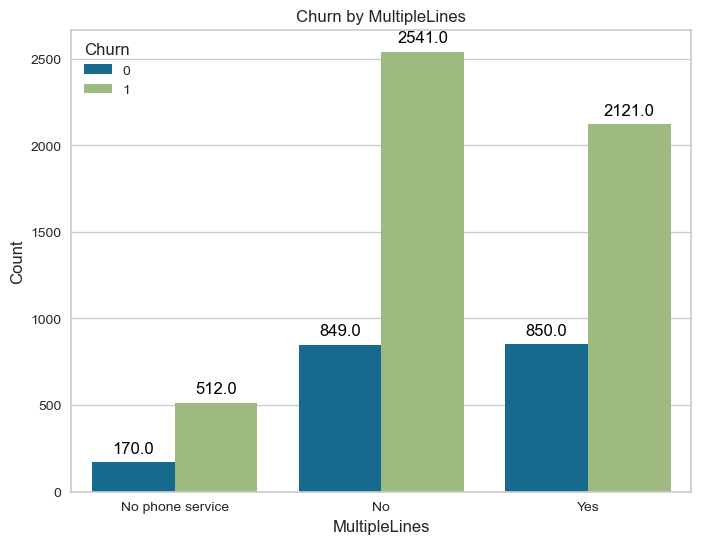

In [83]:
# Visualizing churn by MultipleLines
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='MultipleLines', hue='Churn', data=data)
plt.title('Churn by MultipleLines')
plt.xlabel('MultipleLines')
plt.ylabel('Count')
plt.legend(title='Churn', loc='upper left')

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=12, color='black', xytext=(0, 10),
                textcoords='offset points')

plt.xticks([0, 1, 2], ['No phone service', 'No', 'Yes'])
plt.show()

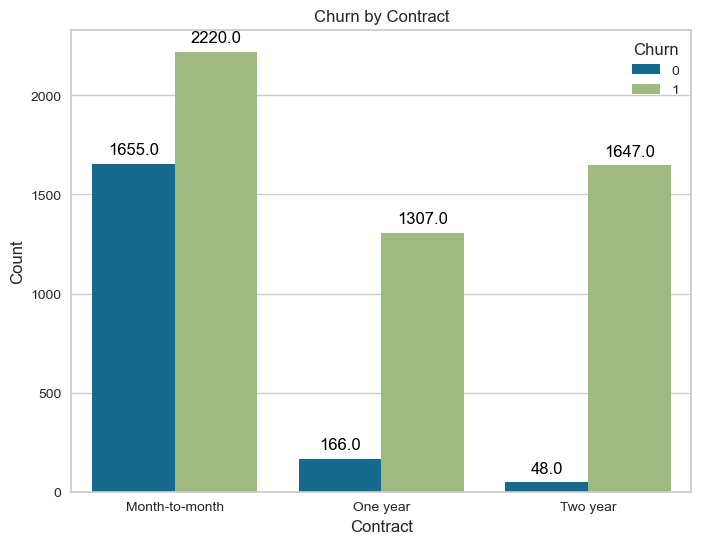

In [84]:
# Visualizing churn by InternetService

plt.figure(figsize=(8, 6))
ax = sns.countplot(x='Contract', hue='Churn', data=data)
plt.title('Churn by Contract')
plt.xlabel('Contract')
plt.ylabel('Count')
plt.legend(title='Churn', loc='upper right')

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=12, color='black', xytext=(0, 10),
                textcoords='offset points')

plt.xticks([0, 1, 2], ['Month-to-month', 'One year', 'Two year'])
plt.show()

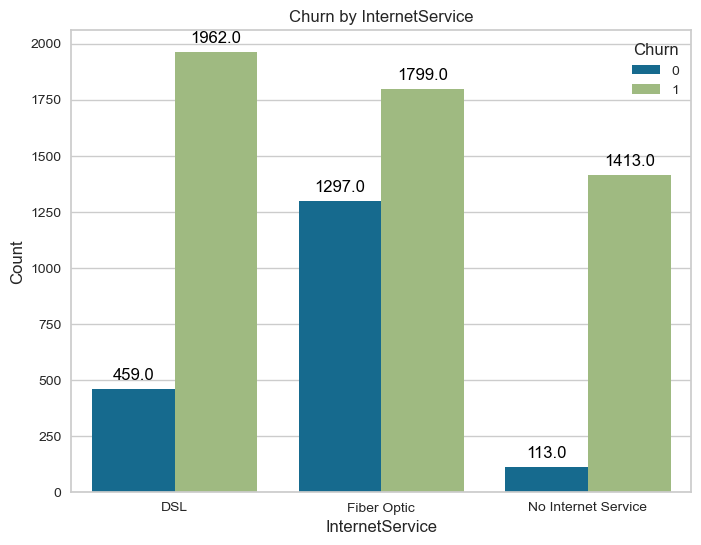

In [85]:
# Visualizing churn by InternetService

plt.figure(figsize=(8, 6))
ax = sns.countplot(x='InternetService', hue='Churn', data=data)
plt.title('Churn by InternetService')
plt.xlabel('InternetService')
plt.ylabel('Count')
plt.legend(title='Churn', loc='upper right')

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=12, color='black', xytext=(0, 10),
                textcoords='offset points')

plt.xticks([0, 1, 2], ['DSL', 'Fiber Optic', 'No Internet Service'])
plt.show()

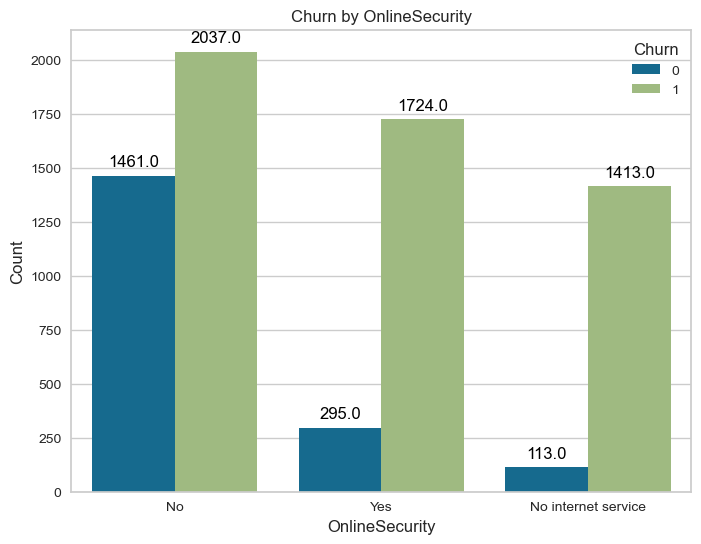

In [86]:
# Visualizing churn by InternetSecurity
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='OnlineSecurity', hue='Churn', data=data)
plt.title('Churn by OnlineSecurity')
plt.xlabel('OnlineSecurity')
plt.ylabel('Count')
plt.legend(title='Churn', loc='upper right')

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=12, color='black', xytext=(0, 10),
                textcoords='offset points')

plt.xticks([0, 1, 2], ['No', 'Yes', 'No internet service'])
plt.show()

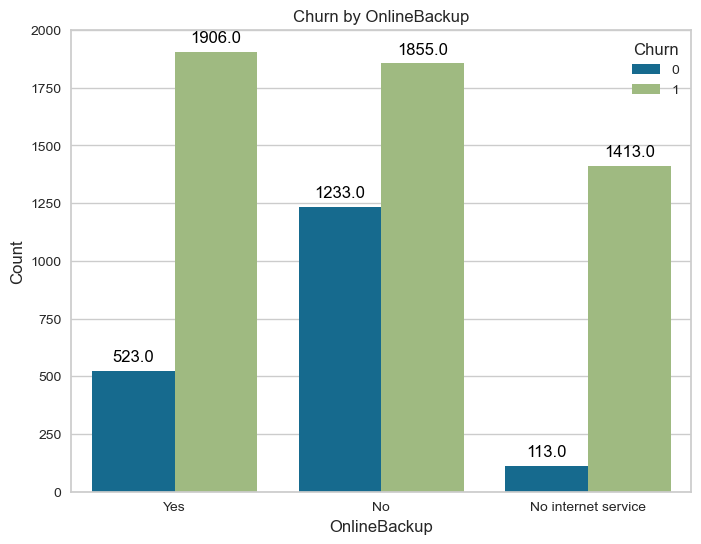

In [87]:
# Visualizing churn by OnlineBackup
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='OnlineBackup', hue='Churn', data=data)
plt.title('Churn by OnlineBackup')
plt.xlabel('OnlineBackup')
plt.ylabel('Count')
plt.legend(title='Churn', loc='upper right')

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=12, color='black', xytext=(0, 10),
                textcoords='offset points')

plt.xticks([0, 1, 2], ['Yes', 'No', 'No internet service'])
plt.show()

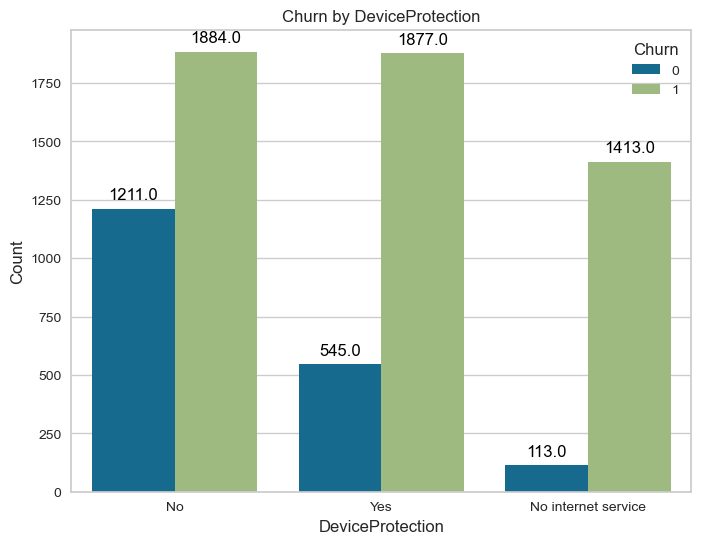

In [88]:
# Visualizing churn by DeviceProtection'
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='DeviceProtection', hue='Churn', data=data)
plt.title('Churn by DeviceProtection')
plt.xlabel('DeviceProtection')
plt.ylabel('Count')
plt.legend(title='Churn', loc='upper right')

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=12, color='black', xytext=(0, 10),
                textcoords='offset points')

plt.xticks([0, 1, 2], ['No', 'Yes', 'No internet service'])
plt.show()

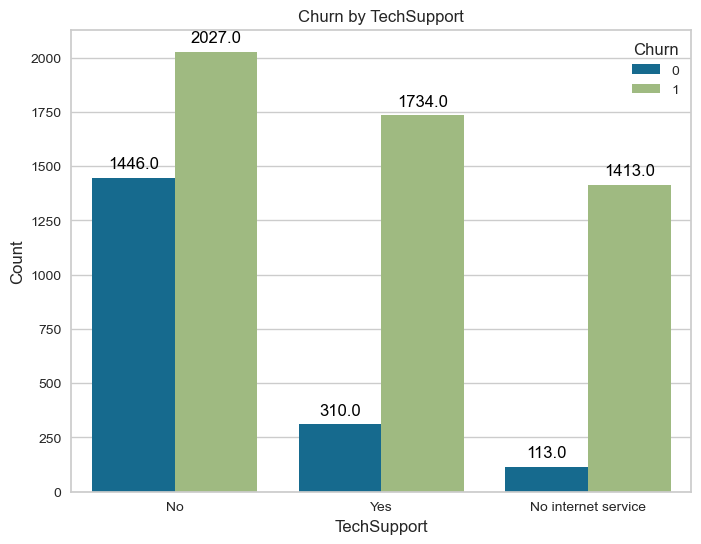

In [89]:
# Visualizing churn by TechSupport
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='TechSupport', hue='Churn', data=data)
plt.title('Churn by TechSupport')
plt.xlabel('TechSupport')
plt.ylabel('Count')
plt.legend(title='Churn', loc='upper right')

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=12, color='black', xytext=(0, 10),
                textcoords='offset points')

plt.xticks([0, 1, 2], ['No', 'Yes', 'No internet service'])
plt.show()

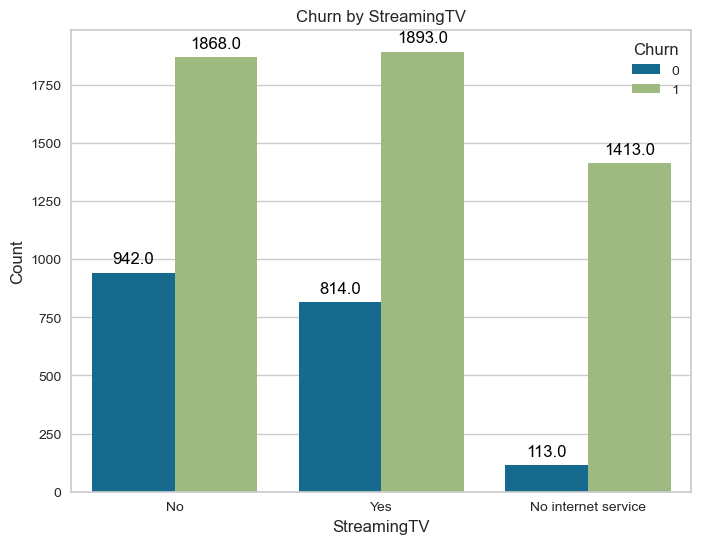

In [90]:
# Visualizing churn by StreamingTV
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='StreamingTV', hue='Churn', data=data)
plt.title('Churn by StreamingTV')
plt.xlabel('StreamingTV')
plt.ylabel('Count')
plt.legend(title='Churn', loc='upper right')

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=12, color='black', xytext=(0, 10),
                textcoords='offset points')

plt.xticks([0, 1, 2], ['No', 'Yes', 'No internet service'])
plt.show()

([<matplotlib.axis.XTick at 0x14c555bc160>,
 [Text(0, 0, 'No'), Text(1, 0, 'Yes'), Text(2, 0, 'No internet service')])

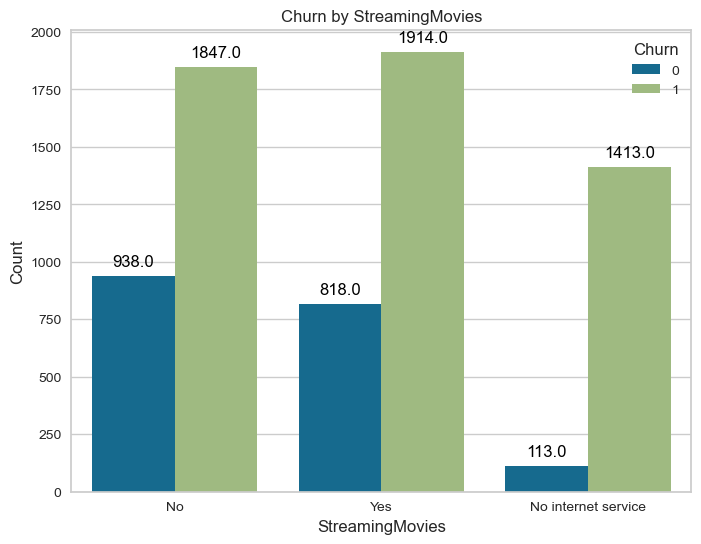

In [94]:
# Visualizing churn by StreamingMovies
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='StreamingMovies', hue='Churn', data=data)
plt.title('Churn by StreamingMovies')
plt.xlabel('StreamingMovies')
plt.ylabel('Count')
plt.legend(title='Churn', loc='upper right')

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=12, color='black', xytext=(0, 10),
                textcoords='offset points')

plt.xticks([0, 1, 2], ['No', 'Yes', 'No internet service'])

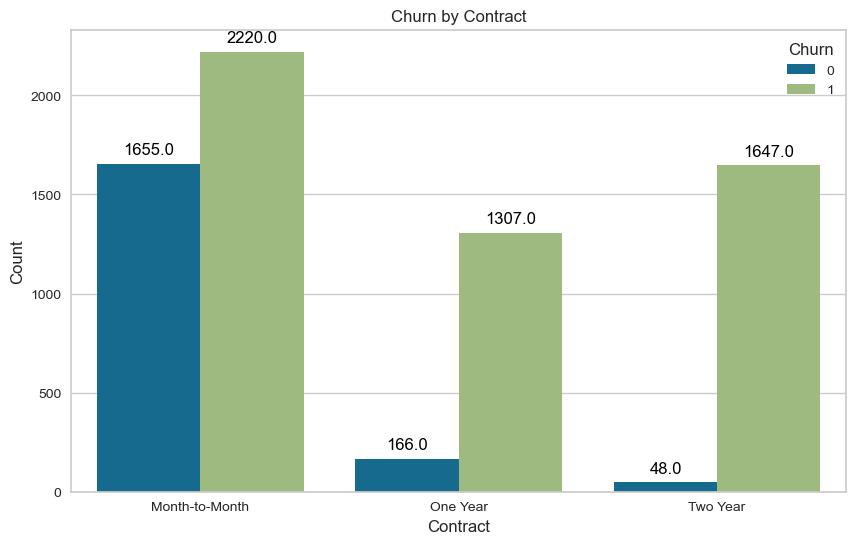

In [93]:
# Visualizing churn by Contract
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='Contract', hue='Churn', data=data)
plt.title('Churn by Contract')
plt.xlabel('Contract')
plt.ylabel('Count')
plt.legend(title='Churn', loc='upper right')

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=12, color='black', xytext=(0, 10),
                textcoords='offset points')

plt.xticks([0, 1, 2], ['Month-to-Month', 'One Year', 'Two Year'])
plt.show()

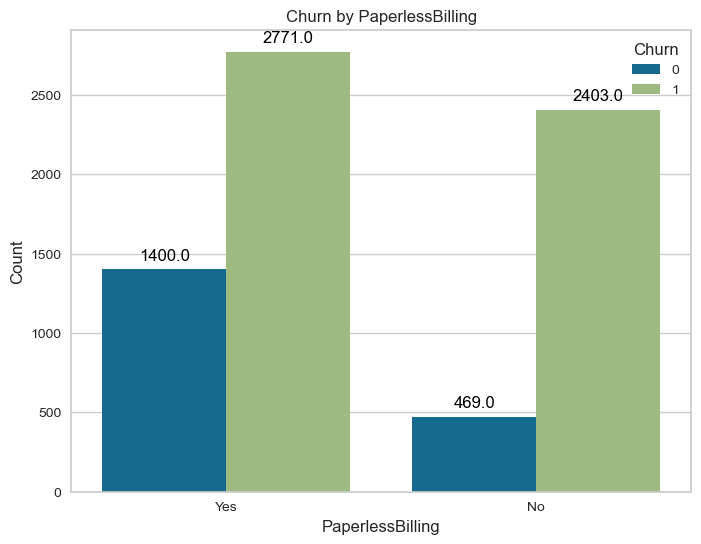

In [95]:
# Visualizing churn by PaperlessBilling
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='PaperlessBilling', hue='Churn', data=data)
plt.title('Churn by PaperlessBilling')
plt.xlabel('PaperlessBilling')
plt.ylabel('Count')
plt.legend(title='Churn', loc='upper right')

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=12, color='black', xytext=(0, 10),
                textcoords='offset points')

plt.xticks([0, 1], ['Yes', 'No'])
plt.show()

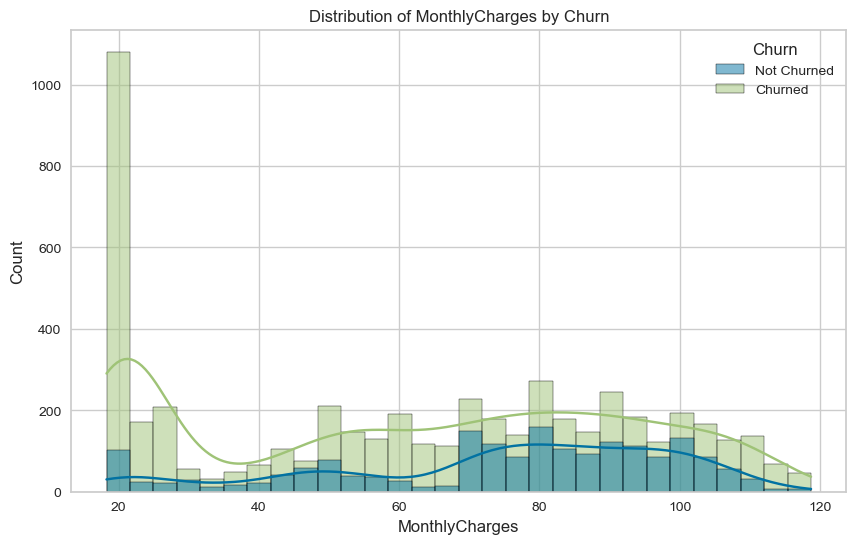

In [96]:
# Visualizing churn by MonthlyCharges
plt.figure(figsize=(10, 6))
ax = sns.histplot(data=data, x='MonthlyCharges', hue='Churn', kde=True, bins=30)
plt.title('Distribution of MonthlyCharges by Churn')
plt.xlabel('MonthlyCharges')
plt.ylabel('Count')

# Manually creating a legend with labels
legend_labels = ['Not Churned', 'Churned']
handles = ax.get_legend().legendHandles
plt.legend(handles=handles, labels=legend_labels, title='Churn')

plt.show()

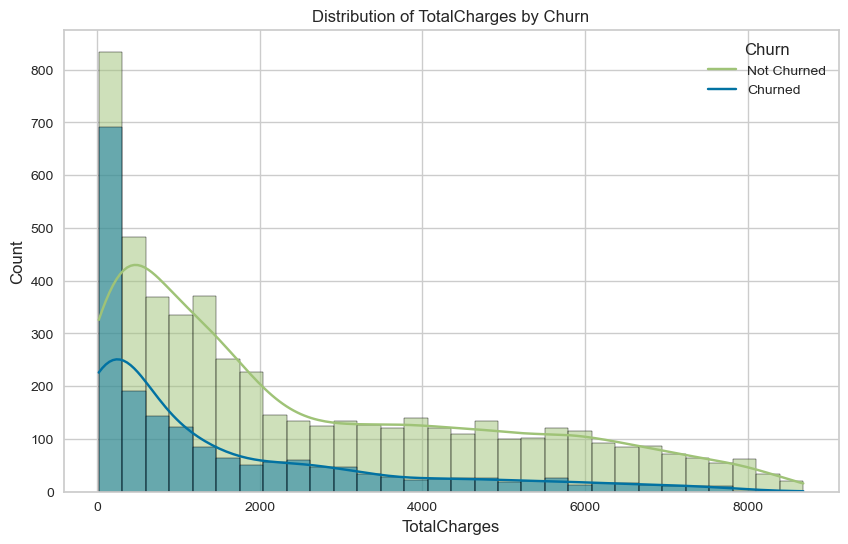

In [97]:
# Visualizing churn by TotalCharges
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='TotalCharges', hue='Churn', kde=True, bins=30)
plt.title('Distribution of TotalCharges by Churn')
plt.xlabel('TotalCharges')
plt.ylabel('Count')

# Set explicit legend labels
legend_labels = ['Not Churned', 'Churned']
plt.legend(title='Churn', labels=legend_labels)

plt.show()

### Multivatrate Analysis

In [98]:
data.corr().head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn
SeniorCitizen,1.000000,0.016567,0.220173,0.102411,-0.150889
tenure,0.016567,1.000000,0.247900,0.825880,0.352229
MonthlyCharges,0.220173,0.247900,1.000000,0.651065,-0.193356
TotalCharges,0.102411,0.825880,0.651065,1.000000,0.199484
Churn,-0.150889,0.352229,-0.193356,0.199484,1.000000


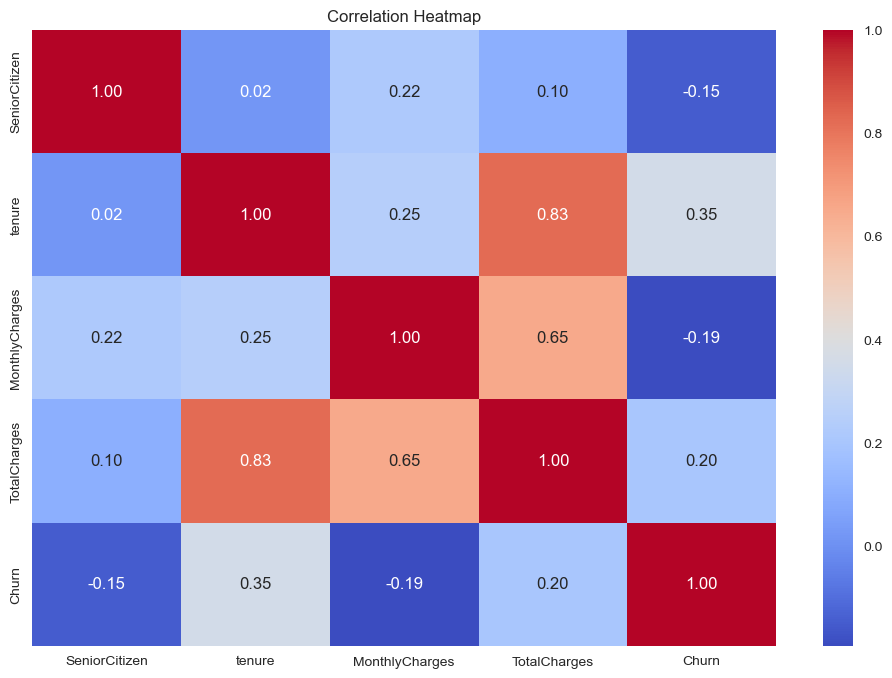

In [99]:
# Selecting the specified features for the heatmap
selected_features = ['SeniorCitizen', 'tenure', 'MultipleLines', 'Contract', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']

# Create a correlation matrix for the selected features
correlation_matrix = data[selected_features].corr()

# Create a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

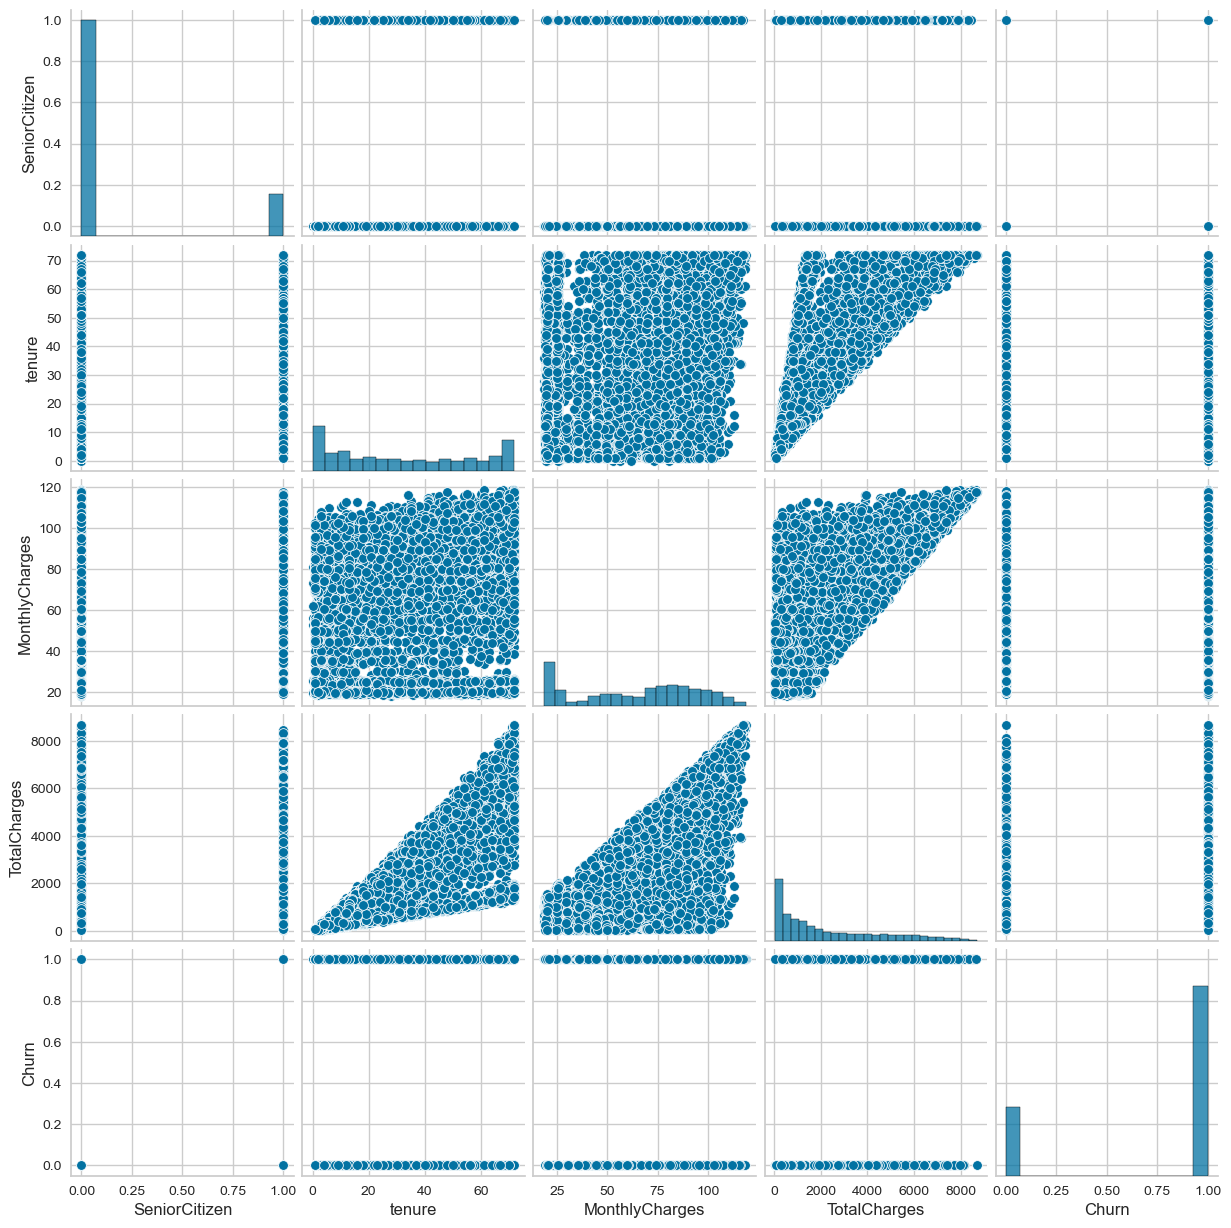

In [100]:
sns.pairplot(data)

### Feature Engineering/Data Preprocessing

In [101]:
# Convert categorical feture'MutipleLines','contract' to Numerical
label_encoder = LabelEncoder()

data['MultipleLines'] = label_encoder.fit_transform(data['MultipleLines'])

data['Contract'] = label_encoder.fit_transform(data['Contract'])

data['gender'] = label_encoder.fit_transform(data['gender'])

data['Partner'] = label_encoder.fit_transform(data['Partner'])

data['Dependents'] = label_encoder.fit_transform(data['Dependents'])

data['PhoneService'] = label_encoder.fit_transform(data['PhoneService'])

data['InternetService'] = label_encoder.fit_transform(data['InternetService'])

data['OnlineSecurity'] = label_encoder.fit_transform(data['OnlineSecurity'])

data['OnlineBackup'] = label_encoder.fit_transform(data['OnlineBackup'])

data['DeviceProtection'] = label_encoder.fit_transform(data['DeviceProtection'])
data['PaperlessBilling'] = label_encoder.fit_transform(data['PaperlessBilling'])

data['TechSupport'] = label_encoder.fit_transform(data['TechSupport'])

data['StreamingTV'] = label_encoder.fit_transform(data['StreamingTV'])

data['StreamingMovies'] = label_encoder.fit_transform(data['StreamingMovies'])


data['PaymentMethod'] = label_encoder.fit_transform(data['PaymentMethod'])

data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')


In [102]:
data.dtypes

gender                int32
SeniorCitizen         int64
Partner               int32
Dependents            int32
tenure                int64
PhoneService          int32
MultipleLines         int32
InternetService       int32
OnlineSecurity        int32
OnlineBackup          int32
DeviceProtection      int32
TechSupport           int32
StreamingTV           int32
StreamingMovies       int32
Contract              int32
PaperlessBilling      int32
PaymentMethod         int32
MonthlyCharges      float64
TotalCharges        float64
Churn                 int64
dtype: object

In [103]:
df1 = data[['gender', 'SeniorCitizen','Partner', 'Dependents','tenure', 'PhoneService', 'MultipleLines','InternetService', 'OnlineSecurity',         
'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges']]         
label= data['Churn']

In [110]:
# Create an imputer with the chosen strategy (e.g., using the mean)
imputer = SimpleImputer(strategy='mean')

# Fit the imputer to the 'TotalCharges' column and transform the data
data['TotalCharges'] = imputer.fit_transform(data[['TotalCharges']])

In [111]:
# Check for missing values in the DataFrame
missing_values = data.isnull().sum()
missing_values 

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

### Machine Learning

#### Model Building

###### a)  Logistic Regression

Logistic Regression
Accuracy: 0.8119233498935415
Precision: 0.8539944903581267
Recall: 0.8976833976833977
F1-score: 0.8752941176470589
AUC-ROC: 0.7357049696191786


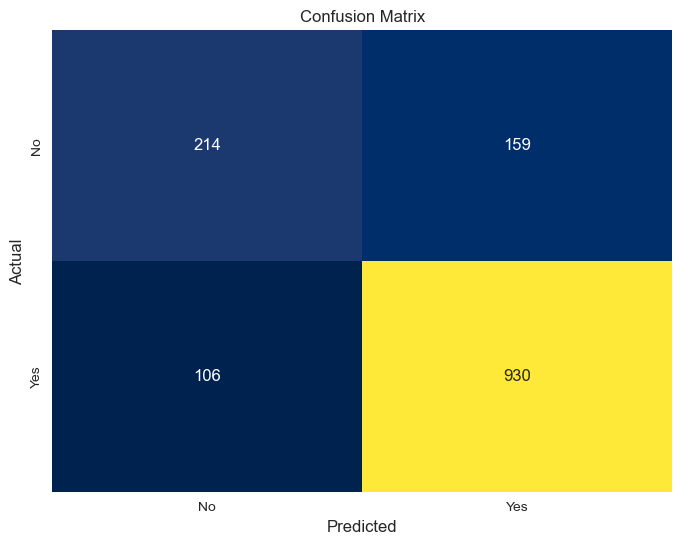

In [114]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
ly_pred = logreg.predict(X_test)

print("Logistic Regression")
print("Accuracy:", accuracy_score(y_test, ly_pred))
print("Precision:", precision_score(y_test, ly_pred))
print("Recall:", recall_score(y_test, ly_pred))
print("F1-score:", f1_score(y_test, ly_pred))
print("AUC-ROC:", roc_auc_score(y_test, ly_pred))

# Calculating the confusion matrix
confusion = confusion_matrix(y_test, ly_pred)

# Visualize the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt="d", cmap="cividis", cbar=False, 
            xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

###### b) Support Vector Machines (SVM)

SVM
Accuracy: 0.7352732434350603
Precision: 0.7352732434350603
Recall: 1.0
F1-score: 0.847443762781186
AUC-ROC: 0.5


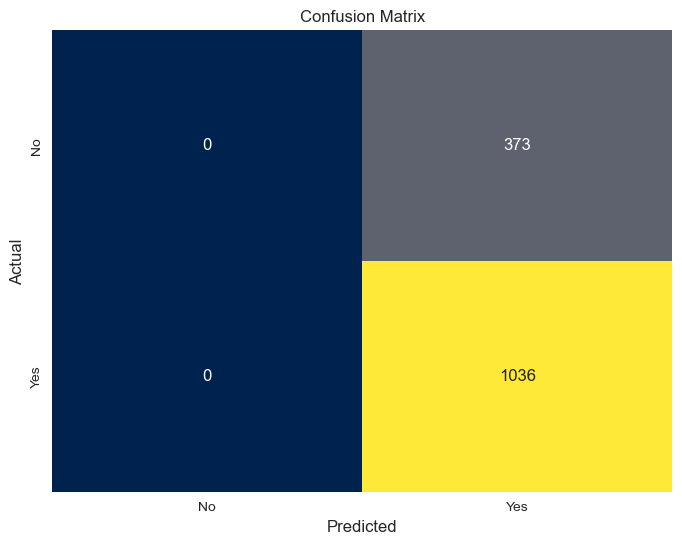

In [132]:
SVM =SVC(kernel='rbf', C=1.0)
SVM.fit(X_train, y_train)
ly_pred = SVM.predict(X_test)

print("SVM")
print("Accuracy:", accuracy_score(y_test, ly_pred))
print("Precision:", precision_score(y_test, ly_pred))
print("Recall:", recall_score(y_test, ly_pred))
print("F1-score:", f1_score(y_test, ly_pred))
print("AUC-ROC:", roc_auc_score(y_test, ly_pred))

# Calculating the confusion matrix
confusion = confusion_matrix(y_test, ly_pred)

# Visualize the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt="d", cmap="cividis", cbar=False, 
            xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


###### c) Random Forest

Random Forest
Accuracy: 0.7863733144073811
Precision: 0.8266666666666667
Recall: 0.8976833976833977
F1-score: 0.8607126330402591
AUC-ROC: 0.6874475969650231


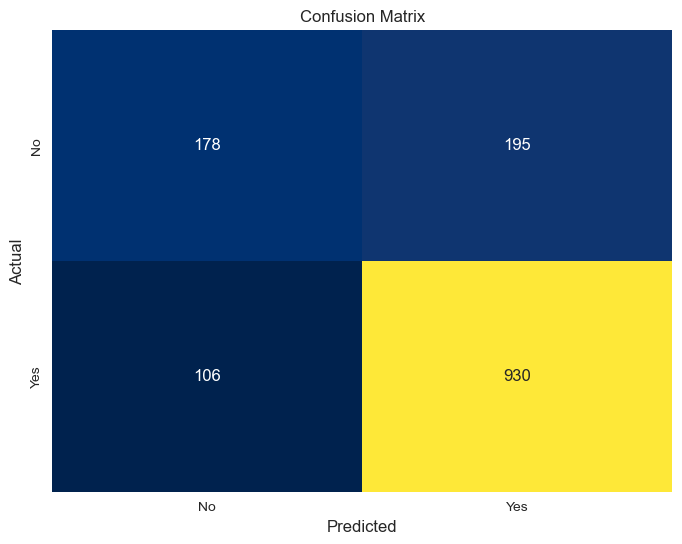

In [127]:
RanFor = RandomForestClassifier(random_state=42)
RanFor.fit(X_train, y_train)
ly_pred = RanFor.predict(X_test)

print("Random Forest")
print("Accuracy:", accuracy_score(y_test, ly_pred))
print("Precision:", precision_score(y_test, ly_pred))
print("Recall:", recall_score(y_test, ly_pred))
print("F1-score:", f1_score(y_test, ly_pred))
print("AUC-ROC:", roc_auc_score(y_test, ly_pred))

# Calculating the confusion matrix
confusion = confusion_matrix(y_test, ly_pred)

# Visualize the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt="d", cmap="cividis", cbar=False, 
            xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


###### d) Naive Bayes Classifier (Gaussian Naive Bayes)

Naive Bayes
Accuracy: 0.759403832505323
Precision: 0.9001148105625718
Recall: 0.7567567567567568
F1-score: 0.8222338751966439
AUC-ROC: 0.7617563944641693


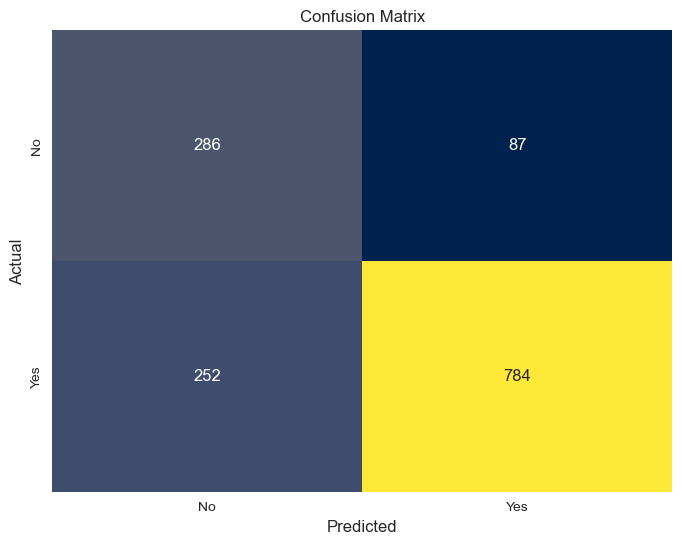

In [128]:
NB = GaussianNB()
NB.fit(X_train, y_train)
ly_pred = NB.predict(X_test)

print("Naive Bayes")
print("Accuracy:", accuracy_score(y_test, ly_pred))
print("Precision:", precision_score(y_test, ly_pred))
print("Recall:", recall_score(y_test, ly_pred))
print("F1-score:", f1_score(y_test, ly_pred))
print("AUC-ROC:", roc_auc_score(y_test, ly_pred))

# Calculating the confusion matrix
confusion = confusion_matrix(y_test, ly_pred)

# Visualize the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt="d", cmap="cividis", cbar=False, 
            xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

###### e) Decision Tree

Decision Tree
Accuracy: 0.7374024130589071
Precision: 0.8226744186046512
Recall: 0.8194980694980695
F1-score: 0.8210831721470019
AUC-ROC: 0.6644407237570776


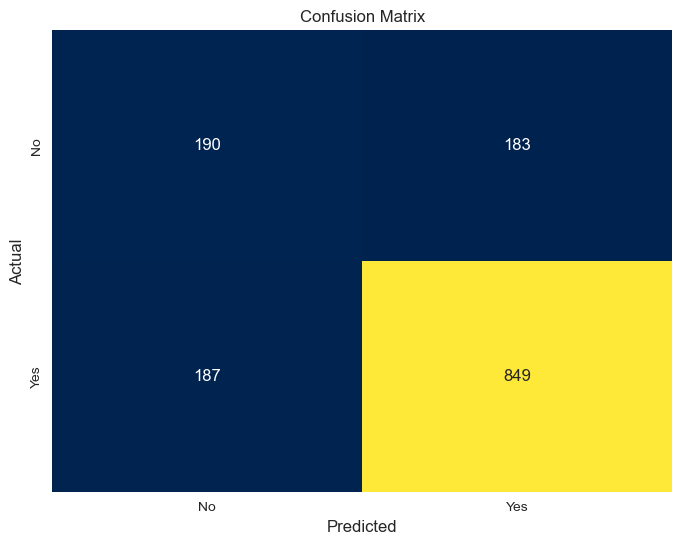

In [129]:
DT = DecisionTreeClassifier()
DT.fit(X_train, y_train)
dt_pred = DT.predict(X_test)



print("Decision Tree")
print("Accuracy:", accuracy_score(y_test, dt_pred))
print("Precision:", precision_score(y_test, dt_pred))
print("Recall:", recall_score(y_test, dt_pred))
print("F1-score:", f1_score(y_test, dt_pred))
print("AUC-ROC:", roc_auc_score(y_test, dt_pred))

# Calculating the confusion matrix
confusion = confusion_matrix(y_test, dt_pred)

# Visualize the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt="d", cmap="cividis", cbar=False, 
            xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

###### f) Gradient Boosting

Gradient Boosting
Accuracy: 0.8062455642299503
Precision: 0.840321141837645
Recall: 0.9092664092664092
F1-score: 0.8734353268428373
AUC-ROC: 0.7146868239361537


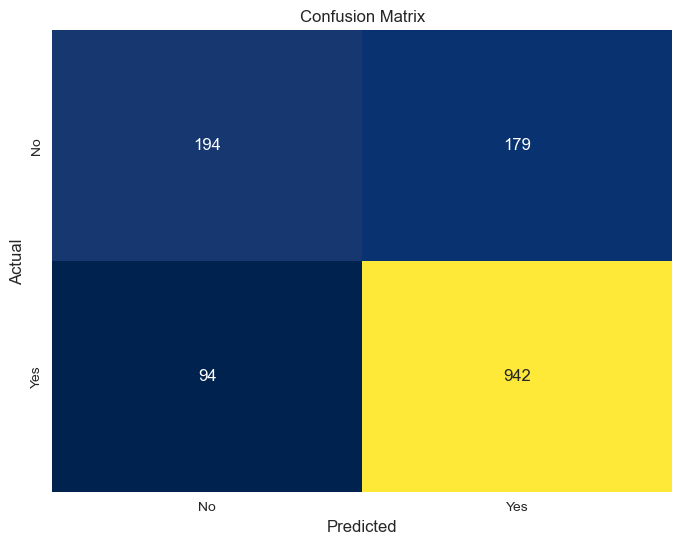

In [130]:
# Create and train the Gradient Boosting model
GB = GradientBoostingClassifier()
GB.fit(X_train, y_train)
gb_pred = GB.predict(X_test)

print("Gradient Boosting")
print("Accuracy:", accuracy_score(y_test, gb_pred))
print("Precision:", precision_score(y_test, gb_pred))
print("Recall:", recall_score(y_test, gb_pred))
print("F1-score:", f1_score(y_test, gb_pred))
print("AUC-ROC:", roc_auc_score(y_test, gb_pred))

# Calculating the confusion matrix
confusion = confusion_matrix(y_test, gb_pred)

# Visualize the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt="d", cmap="cividis", cbar=False, 
            xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

###### g) K-Nearest Neighbors Classifier

K-Nearest
Accuracy: 0.7735982966643009
Precision: 0.8209489704565801
Recall: 0.8851351351351351
F1-score: 0.8518346493265211
AUC-ROC: 0.6744710528222593


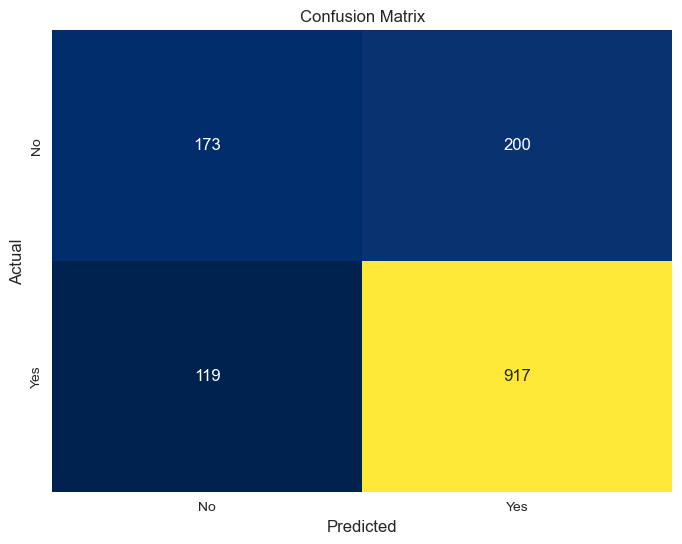

In [131]:
KNN = KNeighborsClassifier()
KNN.fit(X_train, y_train)
knn_pred = KNN.predict(X_test)
print("K-Nearest")
print("Accuracy:", accuracy_score(y_test, knn_pred))
print("Precision:", precision_score(y_test, knn_pred))
print("Recall:", recall_score(y_test, knn_pred))
print("F1-score:", f1_score(y_test, knn_pred))
print("AUC-ROC:", roc_auc_score(y_test, knn_pred))

# Calculating the confusion matrix
confusion = confusion_matrix(y_test, knn_pred)

# Visualize the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt="d", cmap="cividis", cbar=False, 
            xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [158]:
acc_list ={}
precision_list = {}
recall_list = {}
roc_list = {}
con_mat = 

for classifier in classifiers:
    model = classifier[0]
    model.fit(X_train, y_train)
    model_name = classifier[1]
    
    pred = model.predict(X_test)
    
    a_score = accuracy_score(y_test, pred)
    p_score = precision_score(y_test, pred)
    r_score = recall_score(y_test, pred)
    roc_score = roc_auc_score(y_test, pred)
    
    acc_list [model_name] = ([str(round(a_score*100, 2)) + '%'])
    precision_list[model_name] = ([str(round(r_score*100, 2)) + '%'])
    recall_list[model_name] = ([str(round(r_score*100, 2))  + '%'])
    roc_list[model_name] = ([str(round(roc_score*100, 2)) + '%'])
    
    if model_name != Classifiers[-1][1]:
       print('')

In [159]:
print("Accuracy Score")
s1 = pd.DataFrame(acc_list)
s1.head()

Accuracy Score


,Random Forest,K-Nearest Neighbours,SVC,Naive Bayes,Decision tree,Logistic Regression
0,79.56%,77.36%,73.53%,75.94%,73.81%,81.19%


In [160]:
print("Precision")
s2 = pd.DataFrame(precision_list)
s2.head()

Precision


,Random Forest,K-Nearest Neighbours,SVC,Naive Bayes,Decision tree,Logistic Regression
0,90.93%,88.51%,100.0%,75.68%,82.24%,89.77%


In [161]:
print("Recall_list")
s3 = pd.DataFrame(recall_list)
s3.head()

Recall_list


,Random Forest,K-Nearest Neighbours,SVC,Naive Bayes,Decision tree,Logistic Regression
0,90.93%,88.51%,100.0%,75.68%,82.24%,89.77%


In [162]:
print("roc_list")
s4 = pd.DataFrame(roc_list)
s4.head() 

roc_list


,Random Forest,K-Nearest Neighbours,SVC,Naive Bayes,Decision tree,Logistic Regression
0,69.46%,67.45%,50.0%,76.18%,66.32%,73.57%


In [145]:
Classifiers

[[XGBClassifier(base_score=None, booster=None, callbacks=None,
                colsample_bylevel=None, colsample_bynode=None,
                colsample_bytree=None, device=None, early_stopping_rounds=None,
                enable_categorical=False, eval_metric=None, feature_types=None,
                gamma=None, grow_policy=None, importance_type=None,
                interaction_constraints=None, learning_rate=None, max_bin=None,
                max_cat_threshold=None, max_cat_to_onehot=None,
                max_delta_step=None, max_depth=None, max_leaves=None,
                min_child_weight=None, missing=nan, monotone_constraints=None,
                multi_strategy=None, n_estimators=None, n_jobs=None,
                num_parallel_tree=None, random_state=None, ...),
  'XGB Classifier'],
 [RandomForestClassifier(), 'Random Forest'],
 [KNeighborsClassifier(), 'K-Nearest Neighbours'],
 [SGDClassifier(), 'SGD Classifier'],
 [SVC(), 'SVC'],
 [GaussianNB(), 'Naive Bayes'],
 [DecisionTree

In [149]:
Classifiers[0]

[XGBClassifier(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bynode=None,
               colsample_bytree=None, device=None, early_stopping_rounds=None,
               enable_categorical=False, eval_metric=None, feature_types=None,
               gamma=None, grow_policy=None, importance_type=None,
               interaction_constraints=None, learning_rate=None, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=None, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               multi_strategy=None, n_estimators=None, n_jobs=None,
               num_parallel_tree=None, random_state=None, ...),
 'XGB Classifier']